In [8]:
import numpy as np
import numpy.random as rd
import pandas as pd

import seaborn as sns
import math
import sklearn

import pystan
from pystan import StanModel

%matplotlib inline
import matplotlib.pyplot as plt

In [9]:
df_T = pd.read_csv('O157_data_Trans.csv')
print(df_T)

    Time      CO94      CO92      CO91      CO44      CO42      CO41  \
0      0  3.980003  1.812913  0.522879  3.997823  2.230449  0.698970   
1      0  3.788875  1.176091  0.823909  3.959041  3.035430  1.301030   
2      0  3.752048  1.397940  0.698970  3.963788  2.829304  1.397940   
3      6  4.498311  2.176091  1.176091  7.477121  6.706718  5.567026   
4      6  4.130334  1.397940  0.698970  7.698970  6.301030  4.740363   
5      6  4.146128  1.698970  0.000000  8.217484  6.414973  5.694605   
6     12  5.653213  2.740363  0.000000  8.997823  7.602060  6.716003   
7     12  4.835691  2.342423  0.698970  8.919078  7.544068  6.498311   
8     12  4.822822  3.071882  0.698970  8.956649  7.602060  6.176091   
9     24  8.431364  2.544068  0.698970  9.006466  8.060698  7.247973   
10    24  6.190332  1.602060  1.176091  9.064458  8.819544  7.397940   
11    24  6.096910  1.301030  2.060698  9.031408  8.848189  7.000000   
12    36  7.517196  2.937016  0.698970  8.942008  8.190332  8.14

In [10]:
C94 = df_T.iloc[0:24 , 1]
C92 = df_T.iloc[0:24 , 2]
C91 = df_T.iloc[0:24 , 3]
C44 = df_T.iloc[0:24 , 4]
C42 = df_T.iloc[0:24 , 5]
C41 = df_T.iloc[0:24 , 6]

E94 = df_T.iloc[0:24 , 7]
E92 = df_T.iloc[0:24 , 8]
E91 = df_T.iloc[0:24 , 9]
E44 = df_T.iloc[0:24 , 10]
E42 = df_T.iloc[0:24 , 11]
E41 = df_T.iloc[0:24 , 12]

C04 = df_T.iloc[0:24 , 13]
C02 = df_T.iloc[0:24 , 14]
C01 = df_T.iloc[0:24 , 15]

#Time
ts = df_T.iloc[0:24, 0].values

#個数N
N = len(df_T)

In [11]:
ts_add = np.arange(0, 72.1, 20/100, dtype="float")

In [12]:
ts_add

array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ,
        2.2,  2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,  3.8,  4. ,  4.2,
        4.4,  4.6,  4.8,  5. ,  5.2,  5.4,  5.6,  5.8,  6. ,  6.2,  6.4,
        6.6,  6.8,  7. ,  7.2,  7.4,  7.6,  7.8,  8. ,  8.2,  8.4,  8.6,
        8.8,  9. ,  9.2,  9.4,  9.6,  9.8, 10. , 10.2, 10.4, 10.6, 10.8,
       11. , 11.2, 11.4, 11.6, 11.8, 12. , 12.2, 12.4, 12.6, 12.8, 13. ,
       13.2, 13.4, 13.6, 13.8, 14. , 14.2, 14.4, 14.6, 14.8, 15. , 15.2,
       15.4, 15.6, 15.8, 16. , 16.2, 16.4, 16.6, 16.8, 17. , 17.2, 17.4,
       17.6, 17.8, 18. , 18.2, 18.4, 18.6, 18.8, 19. , 19.2, 19.4, 19.6,
       19.8, 20. , 20.2, 20.4, 20.6, 20.8, 21. , 21.2, 21.4, 21.6, 21.8,
       22. , 22.2, 22.4, 22.6, 22.8, 23. , 23.2, 23.4, 23.6, 23.8, 24. ,
       24.2, 24.4, 24.6, 24.8, 25. , 25.2, 25.4, 25.6, 25.8, 26. , 26.2,
       26.4, 26.6, 26.8, 27. , 27.2, 27.4, 27.6, 27.8, 28. , 28.2, 28.4,
       28.6, 28.8, 29. , 29.2, 29.4, 29.6, 29.8, 30

In [13]:
N_add = len(ts_add)

In [14]:
dat_C94 = {'N' : N, 'ts' : ts, 'y' : C94, 'N_add' : N_add, 'ts_add': ts_add}
dat_C92 = {'N' : N, 'ts' : ts, 'y' : C92, 'N_add' : N_add, 'ts_add': ts_add}
dat_C91 = {'N' : N, 'ts' : ts, 'y' : C91, 'N_add' : N_add, 'ts_add': ts_add}
dat_C44 = {'N' : N, 'ts' : ts, 'y' : C44, 'N_add' : N_add, 'ts_add': ts_add}
dat_C42 = {'N' : N, 'ts' : ts, 'y' : C42, 'N_add' : N_add, 'ts_add': ts_add}
dat_C41 = {'N' : N, 'ts' : ts, 'y' : C41, 'N_add' : N_add, 'ts_add': ts_add}

dat_C04 = {'N' : N, 'ts' : ts, 'y' : C04, 'N_add' : N_add, 'ts_add': ts_add}
dat_C02 = {'N' : N, 'ts' : ts, 'y' : C02, 'N_add' : N_add, 'ts_add': ts_add}
dat_C01 = {'N' : N, 'ts' : ts, 'y' : C01, 'N_add' : N_add, 'ts_add': ts_add}

dat_E94 = {'N' : N, 'ts' : ts, 'y' : E94, 'N_add' : N_add, 'ts_add': ts_add}
dat_E92 = {'N' : N, 'ts' : ts, 'y' : E92, 'N_add' : N_add, 'ts_add': ts_add}
dat_E91 = {'N' : N, 'ts' : ts, 'y' : E91, 'N_add' : N_add, 'ts_add': ts_add}
dat_E44 = {'N' : N, 'ts' : ts, 'y' : E44, 'N_add' : N_add, 'ts_add': ts_add}
dat_E42 = {'N' : N, 'ts' : ts, 'y' : E42, 'N_add' : N_add, 'ts_add': ts_add}
dat_E41 = {'N' : N, 'ts' : ts, 'y' : E41, 'N_add' : N_add, 'ts_add': ts_add}

In [8]:
#基本，fit
code = '''
data {
  int N;  // number of measurement times
  real ts[N];  // measurement times > 0
  real y[N];  // measured populations
  int N_add;
  real ts_add[N_add]; 
}

parameters {
  real<lower = 0, upper = 11> Nmax;
  real<lower = 0, upper = 10> N0;
  real<lower = 0, upper = 5> mumax; 
  real<lower = 0, upper = 72> lag;
  real<lower = 0, upper = 4> sigma;   // measurement errors
}

model {
 Nmax ~ cauchy(8, 1);
 N0 ~ cauchy(4, 1);
 mumax ~ cauchy(1, 1);
 sigma ~ cauchy(0, 0.5);

 for (i in 1:N) 
    y[i] ~ normal((Nmax + log10((-1 + exp(mumax * lag) + exp(mumax * ts[i]))/(exp(mumax * ts[i]) -1 + (exp(mumax * lag) * 10^(Nmax - N0))))) , sigma);
}

generated quantities {
  real y_add[N_add];
  real y_rep[N_add];
  
       for (n in 1:N_add){
         y_add[n] = Nmax + log10((-1 + exp(mumax * lag) + exp(mumax * ts_add[n]))/(exp(mumax * ts_add[n]) -1 + (exp(mumax * lag) * 10^(Nmax - N0))));
         y_rep[n] = normal_rng(y_add[n], sigma);
    }
}
'''

%time stm = StanModel(model_code=code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_fec8c86e0d1ce8c90296b81748882838 NOW.


CPU times: user 1.43 s, sys: 90.8 ms, total: 1.53 s
Wall time: 1min 7s


In [9]:
n_itr = 3500
n_warmup = 1000
chains = 4

# サンプリングの実行
%time fit_C94 = stm.sampling(data=dat_C94, iter=n_itr, chains=chains, n_jobs=-1, warmup=n_warmup, algorithm="NUTS", verbose=False, seed=1, control = dict(adapt_delta = 0.99, max_treedepth = 20))

CPU times: user 3.9 s, sys: 274 ms, total: 4.17 s
Wall time: 11.8 s


In [10]:
print(fit_C94)

Inference for Stan model: anon_model_fec8c86e0d1ce8c90296b81748882838.
4 chains, each with iter=3500; warmup=1000; thin=1; 
post-warmup draws per chain=2500, total post-warmup draws=10000.

             mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
Nmax         7.97  2.4e-3   0.16   7.66   7.87   7.98   8.08   8.29   4454    1.0
N0           3.93  6.7e-3   0.26   3.46   3.75   3.92   4.09   4.49   1470    1.0
mumax        0.42    0.01   0.24   0.27   0.33   0.37   0.43   1.12    286   1.01
lag          5.61    0.16   3.74   0.46   2.99    5.1    7.4  16.45    537   1.01
sigma         0.5  1.5e-3   0.09   0.36   0.43   0.48   0.54    0.7   3482    1.0
y_add[1]     3.94  6.6e-3   0.25   3.47   3.76   3.93   4.09   4.49   1476    1.0
y_add[2]     3.94  6.5e-3   0.25   3.48   3.77   3.93    4.1   4.49   1485    1.0
y_add[3]     3.95  6.4e-3   0.25    3.5   3.78   3.94    4.1   4.49   1495    1.0
y_add[4]     3.96  6.2e-3   0.24   3.51    3.8   3.95   4.11   4.49   15

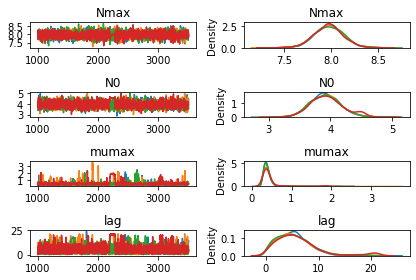

In [11]:
samples = fit_C94.extract(permuted=False, inc_warmup=True)
paraname = fit_C94.sim["fnames_oi"]
palette = sns.color_palette()
ms = fit_C94.extract(permuted=False, inc_warmup=True)
iter_from = fit_C94.sim['warmup']
iter_range = np.arange(iter_from, ms.shape[0])
paraname = fit_C94.sim['fnames_oi']
num_pages = 1

for pg in range(num_pages):
    plt.figure()
    for pos in range(4):
        pi = pg*4 + pos
        if pi >= len(paraname): break
        plt.subplot(4, 2, 2*pos+1)
        plt.tight_layout()
        [plt.plot(iter_range + 1, ms[iter_range,ci,pi], color=palette[ci]) for ci in range(ms.shape[1])]
        plt.title(paraname[pi])
        plt.subplot(4, 2, 2*(pos+1))
        plt.tight_layout()
        [sns.kdeplot(ms[iter_range,ci,pi], color=palette[ci]) for ci in range(ms.shape[1])]
        plt.title(paraname[pi])
    plt.show()

In [12]:
#基本，fit
code = '''
data {
  int N;  // number of measurement times
  real ts[N];  // measurement times > 0
  real y[N];  // measured populations
  int N_add;
  real ts_add[N_add]; 
}

parameters {
  real<lower = 0, upper = 11> Nmax;
  real<lower = 0, upper = 10> N0;
  real<lower = 0, upper = 5> mumax; 
  real<lower = 0, upper = 72> lag;
  real<lower = 0, upper = 4> sigma;   // measurement errors
}

model {
 Nmax ~ cauchy(2, 1);
 N0 ~ cauchy(2, 1);
 mumax ~ cauchy(1, 1);
 sigma ~ cauchy(0, 0.5);

 for (i in 1:N) 
    y[i] ~ normal((Nmax + log10((-1 + exp(mumax * lag) + exp(mumax * ts[i]))/(exp(mumax * ts[i]) -1 + (exp(mumax * lag) * 10^(Nmax - N0))))) , sigma);
}

generated quantities {
  real y_add[N_add];
  real y_rep[N_add];
  
       for (n in 1:N_add){
         y_add[n] = Nmax + log10((-1 + exp(mumax * lag) + exp(mumax * ts_add[n]))/(exp(mumax * ts_add[n]) -1 + (exp(mumax * lag) * 10^(Nmax - N0))));
         y_rep[n] = normal_rng(y_add[n], sigma);
    }
}
'''

%time stm = StanModel(model_code=code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_4fb65f457ccd5cc40813a4d5420e4209 NOW.


CPU times: user 1.49 s, sys: 65.2 ms, total: 1.55 s
Wall time: 1min 4s


In [13]:
n_itr = 3500
n_warmup = 1000
chains = 4

# サンプリングの実行
%time fit_C92 = stm.sampling(data=dat_C92, iter=n_itr, chains=chains, n_jobs=-1, warmup=n_warmup, algorithm="NUTS", verbose=False, seed=1, control = dict(adapt_delta = 0.99, max_treedepth = 20))

CPU times: user 3.74 s, sys: 235 ms, total: 3.97 s
Wall time: 17.8 s


In [14]:
print(fit_C92)

Inference for Stan model: anon_model_4fb65f457ccd5cc40813a4d5420e4209.
4 chains, each with iter=3500; warmup=1000; thin=1; 
post-warmup draws per chain=2500, total post-warmup draws=10000.

             mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
Nmax         1.98    0.02   0.39    1.5   1.84   1.97   2.07   2.43    586   1.01
N0           1.79  7.1e-3   0.27   1.17   1.63   1.85   1.99   2.21   1482    1.0
mumax        1.51    0.02   1.06   0.05   0.75   1.27   2.02   4.25   3878    1.0
lag         27.89    0.62  23.89   0.63   5.85  20.19  49.89  70.67   1475    1.0
sigma        0.52  1.5e-3   0.08   0.38   0.46   0.51   0.57    0.7   3045    1.0
y_add[1]      1.8  7.0e-3   0.27   1.18   1.63   1.85   1.99   2.21   1487    1.0
y_add[2]      1.8  6.9e-3   0.27   1.19   1.63   1.85   1.99   2.21   1496    1.0
y_add[3]      1.8  6.8e-3   0.26    1.2   1.64   1.85   1.99   2.21   1509    1.0
y_add[4]      1.8  6.7e-3   0.26   1.21   1.64   1.85   1.99   2.21   15

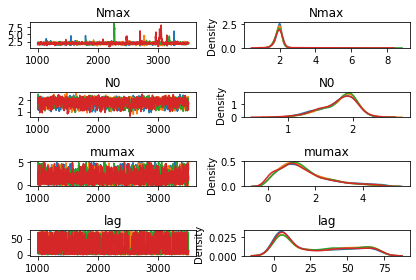

In [15]:
samples = fit_C92.extract(permuted=False, inc_warmup=True)
paraname = fit_C92.sim["fnames_oi"]
palette = sns.color_palette()
ms = fit_C92.extract(permuted=False, inc_warmup=True)
iter_from = fit_C92.sim['warmup']
iter_range = np.arange(iter_from, ms.shape[0])
paraname = fit_C92.sim['fnames_oi']
num_pages = 1

for pg in range(num_pages):
    plt.figure()
    for pos in range(4):
        pi = pg*4 + pos
        if pi >= len(paraname): break
        plt.subplot(4, 2, 2*pos+1)
        plt.tight_layout()
        [plt.plot(iter_range + 1, ms[iter_range,ci,pi], color=palette[ci]) for ci in range(ms.shape[1])]
        plt.title(paraname[pi])
        plt.subplot(4, 2, 2*(pos+1))
        plt.tight_layout()
        [sns.kdeplot(ms[iter_range,ci,pi], color=palette[ci]) for ci in range(ms.shape[1])]
        plt.title(paraname[pi])
    plt.show()

In [16]:
#基本，fit
code = '''
data {
  int N;  // number of measurement times
  real ts[N];  // measurement times > 0
  real y[N];  // measured populations
  int N_add;
  real ts_add[N_add]; 
}

parameters {
  real<lower = 0, upper = 11> Nmax;
  real<lower = 0, upper = 10> N0;
  real<lower = 0, upper = 5> mumax; 
  real<lower = 0, upper = 72> lag;
  real<lower = 0, upper = 4> sigma;   // measurement errors
}

model {
 Nmax ~ cauchy(1, 1);
 N0 ~ cauchy(1, 1);
 mumax ~ cauchy(1, 1);
 sigma ~ cauchy(0, 0.5);

 for (i in 1:N) 
    y[i] ~ normal((Nmax + log10((-1 + exp(mumax * lag) + exp(mumax * ts[i]))/(exp(mumax * ts[i]) -1 + (exp(mumax * lag) * 10^(Nmax - N0))))) , sigma);
}

generated quantities {
  real y_add[N_add];
  real y_rep[N_add];
  
       for (n in 1:N_add){
         y_add[n] = Nmax + log10((-1 + exp(mumax * lag) + exp(mumax * ts_add[n]))/(exp(mumax * ts_add[n]) -1 + (exp(mumax * lag) * 10^(Nmax - N0))));
         y_rep[n] = normal_rng(y_add[n], sigma);
    }
}
'''

%time stm = StanModel(model_code=code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_31048ade478452d933e98cf70cf04da2 NOW.


CPU times: user 1.58 s, sys: 79.6 ms, total: 1.66 s
Wall time: 1min 4s


In [17]:
n_itr = 3500
n_warmup = 1000
chains = 4

# サンプリングの実行
%time fit_C91 = stm.sampling(data=dat_C91, iter=n_itr, chains=chains, n_jobs=-1, warmup=n_warmup, algorithm="NUTS", verbose=False, seed=1, control = dict(adapt_delta = 0.99, max_treedepth = 20))

CPU times: user 4.07 s, sys: 236 ms, total: 4.3 s
Wall time: 13.5 s


In [18]:
print(fit_C91)

Inference for Stan model: anon_model_31048ade478452d933e98cf70cf04da2.
4 chains, each with iter=3500; warmup=1000; thin=1; 
post-warmup draws per chain=2500, total post-warmup draws=10000.

             mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
Nmax         1.28    0.03   0.67   0.74   1.05   1.19   1.34   2.31    678    1.0
N0           0.73  5.4e-3   0.25   0.22   0.57   0.75   0.91   1.19   2108    1.0
mumax        1.48    0.02    1.1   0.06   0.68   1.24    2.0   4.36   3436    1.0
lag         29.17     0.5  19.57   3.36  14.95  21.54  42.01  70.21   1541    1.0
sigma        0.68  1.8e-3   0.11    0.5    0.6   0.66   0.74   0.92   3757    1.0
y_add[1]     0.73  5.4e-3   0.25   0.23   0.57   0.75   0.91   1.19   2113    1.0
y_add[2]     0.73  5.4e-3   0.25   0.23   0.57   0.75   0.91   1.19   2119    1.0
y_add[3]     0.73  5.3e-3   0.25   0.23   0.57   0.75   0.91   1.19   2128    1.0
y_add[4]     0.73  5.3e-3   0.25   0.23   0.57   0.75   0.91   1.19   21

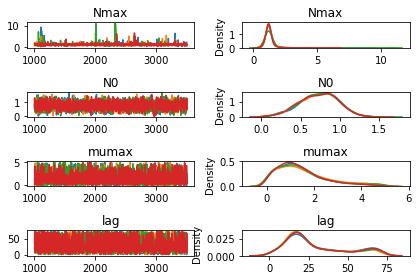

In [19]:
samples = fit_C91.extract(permuted=False, inc_warmup=True)
paraname = fit_C91.sim["fnames_oi"]
palette = sns.color_palette()
ms = fit_C91.extract(permuted=False, inc_warmup=True)
iter_from = fit_C91.sim['warmup']
iter_range = np.arange(iter_from, ms.shape[0])
paraname = fit_C91.sim['fnames_oi']
num_pages = 1

for pg in range(num_pages):
    plt.figure()
    for pos in range(4):
        pi = pg*4 + pos
        if pi >= len(paraname): break
        plt.subplot(4, 2, 2*pos+1)
        plt.tight_layout()
        [plt.plot(iter_range + 1, ms[iter_range,ci,pi], color=palette[ci]) for ci in range(ms.shape[1])]
        plt.title(paraname[pi])
        plt.subplot(4, 2, 2*(pos+1))
        plt.tight_layout()
        [sns.kdeplot(ms[iter_range,ci,pi], color=palette[ci]) for ci in range(ms.shape[1])]
        plt.title(paraname[pi])
    plt.show()

In [20]:
#基本，fit
code = '''
data {
  int N;  // number of measurement times
  real ts[N];  // measurement times > 0
  real y[N];  // measured populations
  int N_add;
  real ts_add[N_add]; 
}

parameters {
  real<lower = 0, upper = 11> Nmax;
  real<lower = 0, upper = 10> N0;
  real<lower = 0, upper = 5> mumax; 
  real<lower = 0, upper = 72> lag;
  real<lower = 0, upper = 4> sigma;   // measurement errors
}

model {
 Nmax ~ cauchy(9, 1);
 N0 ~ cauchy(4, 1);
 mumax ~ cauchy(1, 1);
 sigma ~ cauchy(0, 0.5);

 for (i in 1:N) 
    y[i] ~ normal((Nmax + log10((-1 + exp(mumax * lag) + exp(mumax * ts[i]))/(exp(mumax * ts[i]) -1 + (exp(mumax * lag) * 10^(Nmax - N0))))) , sigma);
}

generated quantities {
  real y_add[N_add];
  real y_rep[N_add];
  
       for (n in 1:N_add){
         y_add[n] = Nmax + log10((-1 + exp(mumax * lag) + exp(mumax * ts_add[n]))/(exp(mumax * ts_add[n]) -1 + (exp(mumax * lag) * 10^(Nmax - N0))));
         y_rep[n] = normal_rng(y_add[n], sigma);
    }
}
'''

%time stm = StanModel(model_code=code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_dbd4405be28c95e89c84d188c49fd742 NOW.


CPU times: user 1.92 s, sys: 89.6 ms, total: 2.01 s
Wall time: 1min 5s


In [21]:
n_itr = 3500
n_warmup = 1000
chains = 4

# サンプリングの実行
%time fit_C44 = stm.sampling(data=dat_C44, iter=n_itr, chains=chains, n_jobs=-1, warmup=n_warmup, algorithm="NUTS", verbose=False, seed=1, control = dict(adapt_delta = 0.99, max_treedepth = 20))

CPU times: user 3.83 s, sys: 250 ms, total: 4.08 s
Wall time: 2min 22s


In [22]:
print(fit_C44)

Inference for Stan model: anon_model_dbd4405be28c95e89c84d188c49fd742.
4 chains, each with iter=3500; warmup=1000; thin=1; 
post-warmup draws per chain=2500, total post-warmup draws=10000.

             mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
Nmax         8.99  4.2e-4   0.03   8.93   8.97   8.99   9.01   9.05   5808    1.0
N0           3.98  1.1e-3   0.08   3.83   3.93   3.98   4.03   4.13   5239    1.0
mumax        2.22    0.01   0.74   1.48   1.67   1.96   2.54    4.3   2773    1.0
lag          1.65    0.02   1.12   0.06   0.72   1.48    2.5   3.95   3472    1.0
sigma        0.13  3.2e-4   0.02    0.1   0.12   0.13   0.14   0.18   4753    1.0
y_add[1]     4.01  1.2e-3   0.09   3.84   3.95   4.01   4.06   4.18   4713    1.0
y_add[2]     4.04  1.7e-3   0.11   3.85   3.97   4.03   4.11   4.27   4195    1.0
y_add[3]     4.08  2.2e-3   0.14   3.86   3.98   4.06   4.17   4.38   3978    1.0
y_add[4]     4.13  2.8e-3   0.18   3.86   3.99   4.08   4.25    4.5   39

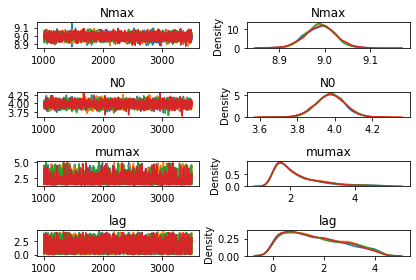

In [23]:
samples =   fit_C44.extract(permuted=False, inc_warmup=True)
paraname =  fit_C44.sim["fnames_oi"]
palette =   sns.color_palette()
ms =        fit_C44.extract(permuted=False, inc_warmup=True)
iter_from = fit_C44.sim['warmup']
iter_range = np.arange(iter_from, ms.shape[0])
num_pages = 1

for pg in range(num_pages):
    plt.figure()
    for pos in range(4):
        pi = pg*4 + pos
        if pi >= len(paraname): break
        plt.subplot(4, 2, 2*pos+1)
        plt.tight_layout()
        [plt.plot(iter_range + 1, ms[iter_range,ci,pi], color=palette[ci]) for ci in range(ms.shape[1])]
        plt.title(paraname[pi])
        plt.subplot(4, 2, 2*(pos+1))
        plt.tight_layout()
        [sns.kdeplot(ms[iter_range,ci,pi], color=palette[ci]) for ci in range(ms.shape[1])]
        plt.title(paraname[pi])
    plt.show()

In [24]:
#基本，fit
code = '''
data {
  int N;  // number of measurement times
  real ts[N];  // measurement times > 0
  real y[N];  // measured populations
  int N_add;
  real ts_add[N_add]; 
}

parameters {
  real<lower = 0, upper = 11> Nmax;
  real<lower = 0, upper = 10> N0;
  real<lower = 0, upper = 5> mumax; 
  real<lower = 0, upper = 72> lag;
  real<lower = 0, upper = 4> sigma;   // measurement errors
}

model {
 Nmax ~ cauchy(9, 1);
 N0 ~ cauchy(2, 1);
 mumax ~ cauchy(1, 1);
 sigma ~ cauchy(0, 0.5);

 for (i in 1:N) 
    y[i] ~ normal((Nmax + log10((-1 + exp(mumax * lag) + exp(mumax * ts[i]))/(exp(mumax * ts[i]) -1 + (exp(mumax * lag) * 10^(Nmax - N0))))) , sigma);
}

generated quantities {
  real y_add[N_add];
  real y_rep[N_add];
  
       for (n in 1:N_add){
         y_add[n] = Nmax + log10((-1 + exp(mumax * lag) + exp(mumax * ts_add[n]))/(exp(mumax * ts_add[n]) -1 + (exp(mumax * lag) * 10^(Nmax - N0))));
         y_rep[n] = normal_rng(y_add[n], sigma);
    }
}
'''

%time stm = StanModel(model_code=code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_c0482bd8e5454e69dd9230f096ca9e15 NOW.


CPU times: user 1.61 s, sys: 88.7 ms, total: 1.7 s
Wall time: 1min 3s


In [26]:
n_itr = 3500
n_warmup = 1000
chains = 4

# サンプリングの実行
%time fit_C42 = stm.sampling(data=dat_C42, iter=n_itr, chains=chains, n_jobs=-1, warmup=n_warmup, algorithm="NUTS", verbose=False, seed=1, control = dict(adapt_delta = 0.99, max_treedepth = 20))

CPU times: user 3.83 s, sys: 266 ms, total: 4.1 s
Wall time: 14.9 s


In [27]:
print(fit_C42)

Inference for Stan model: anon_model_c0482bd8e5454e69dd9230f096ca9e15.
4 chains, each with iter=3500; warmup=1000; thin=1; 
post-warmup draws per chain=2500, total post-warmup draws=10000.

             mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
Nmax         8.64  2.4e-3   0.14   8.37   8.54   8.64   8.73   8.94   3495    1.0
N0           2.75  5.2e-3   0.32   2.13   2.53   2.74   2.95   3.41   3822    1.0
mumax        1.98    0.03   0.83   0.94   1.42   1.79   2.34   4.31   1043    1.0
lag          1.46    0.03   1.15   0.04   0.46   1.19   2.28   3.98   1522    1.0
sigma        0.52  1.2e-3   0.08   0.39   0.46   0.52   0.57   0.72   4560    1.0
y_add[1]     2.78  5.7e-3   0.33   2.16   2.56   2.77   2.99   3.46   3311    1.0
y_add[2]     2.82  6.3e-3   0.34   2.19   2.59   2.81   3.04   3.51   2915    1.0
y_add[3]     2.86  6.9e-3   0.35    2.2   2.62   2.85    3.1   3.58   2618    1.0
y_add[4]     2.91  7.5e-3   0.37   2.22   2.65    2.9   3.16   3.64   24

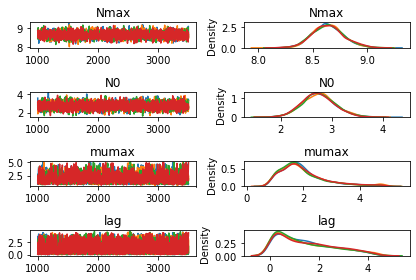

In [28]:
samples =   fit_C42.extract(permuted=False, inc_warmup=True)
paraname =  fit_C42.sim["fnames_oi"]
palette =   sns.color_palette()
ms =        fit_C42.extract(permuted=False, inc_warmup=True)
iter_from = fit_C42.sim['warmup']
iter_range = np.arange(iter_from, ms.shape[0])
num_pages = 1

for pg in range(num_pages):
    plt.figure()
    for pos in range(4):
        pi = pg*4 + pos
        if pi >= len(paraname): break
        plt.subplot(4, 2, 2*pos+1)
        plt.tight_layout()
        [plt.plot(iter_range + 1, ms[iter_range,ci,pi], color=palette[ci]) for ci in range(ms.shape[1])]
        plt.title(paraname[pi])
        plt.subplot(4, 2, 2*(pos+1))
        plt.tight_layout()
        [sns.kdeplot(ms[iter_range,ci,pi], color=palette[ci]) for ci in range(ms.shape[1])]
        plt.title(paraname[pi])
    plt.show()

In [29]:
#基本，fit
code = '''
data {
  int N;  // number of measurement times
  real ts[N];  // measurement times > 0
  real y[N];  // measured populations
  int N_add;
  real ts_add[N_add]; 
}

parameters {
  real<lower = 0, upper = 11> Nmax;
  real<lower = 0, upper = 10> N0;
  real<lower = 0, upper = 5> mumax; 
  real<lower = 0, upper = 72> lag;
  real<lower = 0, upper = 4> sigma;   // measurement errors
}

model {
 Nmax ~ cauchy(9, 1);
 N0 ~ cauchy(1, 1);
 mumax ~ cauchy(1, 1);
 sigma ~ cauchy(0, 0.5);

 for (i in 1:N) 
    y[i] ~ normal((Nmax + log10((-1 + exp(mumax * lag) + exp(mumax * ts[i]))/(exp(mumax * ts[i]) -1 + (exp(mumax * lag) * 10^(Nmax - N0))))) , sigma);
}

generated quantities {
  real y_add[N_add];
  real y_rep[N_add];
  
       for (n in 1:N_add){
         y_add[n] = Nmax + log10((-1 + exp(mumax * lag) + exp(mumax * ts_add[n]))/(exp(mumax * ts_add[n]) -1 + (exp(mumax * lag) * 10^(Nmax - N0))));
         y_rep[n] = normal_rng(y_add[n], sigma);
    }
}
'''

%time stm = StanModel(model_code=code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_3ae5189000358046e9a31e70ed1090ca NOW.


CPU times: user 1.59 s, sys: 91.5 ms, total: 1.68 s
Wall time: 1min 4s


In [30]:
n_itr = 3500
n_warmup = 1000
chains = 4

# サンプリングの実行
%time fit_C41 = stm.sampling(data=dat_C41, iter=n_itr, chains=chains, n_jobs=-1, warmup=n_warmup, algorithm="NUTS", verbose=False, seed=1, control = dict(adapt_delta = 0.99, max_treedepth = 20))

CPU times: user 3.99 s, sys: 270 ms, total: 4.26 s
Wall time: 9.92 s


In [31]:
print(fit_C41)

Inference for Stan model: anon_model_3ae5189000358046e9a31e70ed1090ca.
4 chains, each with iter=3500; warmup=1000; thin=1; 
post-warmup draws per chain=2500, total post-warmup draws=10000.

             mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
Nmax         8.21  4.5e-3   0.23   7.73   8.06   8.22   8.36   8.65   2598    1.0
N0            1.5  7.4e-3   0.42   0.65   1.22    1.5   1.78   2.32   3297    1.0
mumax         1.4    0.02   0.64   0.88   1.05   1.17   1.41   3.39    912    1.0
lag          0.85    0.02   0.86   0.02   0.23   0.55   1.16   3.33   1375    1.0
sigma        0.77  2.3e-3   0.13   0.56   0.68   0.76   0.85   1.08   3257    1.0
y_add[1]     1.55  7.8e-3   0.42   0.68   1.27   1.56   1.83   2.36   2995    1.0
y_add[2]      1.6  8.2e-3   0.43   0.71   1.33   1.62   1.89   2.41   2675    1.0
y_add[3]     1.66  8.7e-3   0.43   0.75   1.39   1.68   1.95   2.47   2410    1.0
y_add[4]     1.73  9.2e-3   0.43   0.79   1.46   1.75   2.02   2.52   22

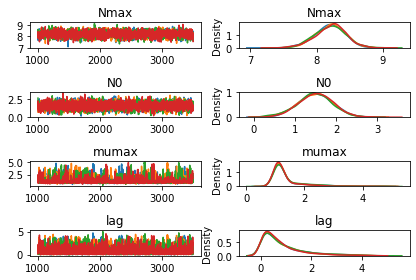

In [32]:
samples =   fit_C41.extract(permuted=False, inc_warmup=True)
paraname =  fit_C41.sim["fnames_oi"]
palette =   sns.color_palette()
ms =        fit_C41.extract(permuted=False, inc_warmup=True)
iter_from = fit_C41.sim['warmup']
iter_range = np.arange(iter_from, ms.shape[0])
num_pages = 1

for pg in range(num_pages):
    plt.figure()
    for pos in range(4):
        pi = pg*4 + pos
        if pi >= len(paraname): break
        plt.subplot(4, 2, 2*pos+1)
        plt.tight_layout()
        [plt.plot(iter_range + 1, ms[iter_range,ci,pi], color=palette[ci]) for ci in range(ms.shape[1])]
        plt.title(paraname[pi])
        plt.subplot(4, 2, 2*(pos+1))
        plt.tight_layout()
        [sns.kdeplot(ms[iter_range,ci,pi], color=palette[ci]) for ci in range(ms.shape[1])]
        plt.title(paraname[pi])
    plt.show()

In [33]:
#基本，fit
code = '''
data {
  int N;  // number of measurement times
  real ts[N];  // measurement times > 0
  real y[N];  // measured populations
  int N_add;
  real ts_add[N_add]; 
}

parameters {
  real<lower = 0, upper = 11> Nmax;
  real<lower = 0, upper = 10> N0;
  real<lower = 0, upper = 5> mumax; 
  real<lower = 0, upper = 72> lag;
  real<lower = 0, upper = 4> sigma;   // measurement errors
}

model {
 Nmax ~ cauchy(9, 1);
 N0 ~ cauchy(9, 1);
 mumax ~ cauchy(1, 1);
 sigma ~ cauchy(0, 0.5);

 for (i in 1:N) 
    y[i] ~ normal((Nmax + log10((-1 + exp(mumax * lag) + exp(mumax * ts[i]))/(exp(mumax * ts[i]) -1 + (exp(mumax * lag) * 10^(Nmax - N0))))) , sigma);
}

generated quantities {
  real y_add[N_add];
  real y_rep[N_add];
  
       for (n in 1:N_add){
         y_add[n] = Nmax + log10((-1 + exp(mumax * lag) + exp(mumax * ts_add[n]))/(exp(mumax * ts_add[n]) -1 + (exp(mumax * lag) * 10^(Nmax - N0))));
         y_rep[n] = normal_rng(y_add[n], sigma);
    }
}
'''

%time stm = StanModel(model_code=code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_13b08c1bd6f3cb9ad95355f612e6b1ef NOW.


CPU times: user 1.69 s, sys: 93.3 ms, total: 1.78 s
Wall time: 1min 6s


In [34]:
n_itr = 3500
n_warmup = 1000
chains = 4

# サンプリングの実行
%time fit_E94 = stm.sampling(data=dat_E94, iter=n_itr, chains=chains, n_jobs=-1, warmup=n_warmup, algorithm="NUTS", verbose=False, seed=1, control = dict(adapt_delta = 0.99, max_treedepth = 20))

CPU times: user 4.72 s, sys: 278 ms, total: 5 s
Wall time: 17.8 s


In [35]:
n_itr = 3500
n_warmup = 1000
chains = 4

# サンプリングの実行
%time fit_E92 = stm.sampling(data=dat_E92, iter=n_itr, chains=chains, n_jobs=-1, warmup=n_warmup, algorithm="NUTS", verbose=False, seed=1, control = dict(adapt_delta = 0.99, max_treedepth = 20))

CPU times: user 4.09 s, sys: 258 ms, total: 4.35 s
Wall time: 10.7 s


In [36]:
n_itr = 3500
n_warmup = 1000
chains = 4

# サンプリングの実行
%time fit_E91 = stm.sampling(data=dat_E91, iter=n_itr, chains=chains, n_jobs=-1, warmup=n_warmup, algorithm="NUTS", verbose=False, seed=1, control = dict(adapt_delta = 0.99, max_treedepth = 20))

CPU times: user 3.76 s, sys: 248 ms, total: 4.01 s
Wall time: 9.86 s


In [17]:
#基本，fit
code = '''
data {
  int N;  // number of measurement times
  real ts[N];  // measurement times > 0
  real y[N];  // measured populations
  int N_add;
  real ts_add[N_add]; 
}

parameters {
  real<lower = 0, upper = 11> Nmax;
  real<lower = 0, upper = 10> N0;
  real<lower = 0, upper = 5> mumax; 
  real<lower = 0, upper = 5> lag;
  real<lower = 0, upper = 4> sigma;   // measurement errors
}

model {
 Nmax ~ cauchy(9, 1);
 N0 ~ cauchy(4, 1);
 mumax ~ cauchy(2, 1);
 lag ~ cauchy(0, 1);
 sigma ~ cauchy(0, 0.5);


 for (i in 1:N) 
    y[i] ~ normal((Nmax + log10((-1 + exp(mumax * lag) + exp(mumax * ts[i]))/(exp(mumax * ts[i]) -1 + (exp(mumax * lag) * 10^(Nmax - N0))))) , sigma);
}

generated quantities {
  real y_add[N_add];
  real y_rep[N_add];
  
       for (n in 1:N_add){
         y_add[n] = Nmax + log10((-1 + exp(mumax * lag) + exp(mumax * ts_add[n]))/(exp(mumax * ts_add[n]) -1 + (exp(mumax * lag) * 10^(Nmax - N0))));
         y_rep[n] = normal_rng(y_add[n], sigma);
    }
}
'''

%time stm = StanModel(model_code=code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_c5f90811e3efefdc6040854e3b3944fe NOW.


CPU times: user 2.15 s, sys: 187 ms, total: 2.34 s
Wall time: 1min 25s


In [ ]:
n_itr = 3500
n_warmup = 1000
chains = 4

# サンプリングの実行
%time fit_E44 = stm.sampling(data=dat_E44, iter=n_itr, chains=chains, n_jobs=-1, warmup=n_warmup, algorithm="NUTS", verbose=False, seed=1, control = dict(adapt_delta = 0.99, max_treedepth = 20))

In [ ]:
#基本，fit
code = '''
data {
  int N;  // number of measurement times
  real ts[N];  // measurement times > 0
  real y[N];  // measured populations
  int N_add;
  real ts_add[N_add]; 
}

parameters {
  real<lower = 0, upper = 11> Nmax;
  real<lower = 0, upper = 10> N0;
  real<lower = 0, upper = 5> mumax; 
  real<lower = 0, upper = 5> lag;
  real<lower = 0, upper = 4> sigma;   // measurement errors
}

model {
 Nmax ~ cauchy(9, 1);
 N0 ~ cauchy(4, 1);
 mumax ~ cauchy(3, 1);
 sigma ~ cauchy(0, 0.5);
 lag ~ cauchy(0, 1); // in log10

 for (i in 1:N) 
    y[i] ~ normal((Nmax + log10((-1 + exp(mumax * log10(lag)) + exp(mumax * ts[i]))/(exp(mumax * ts[i]) -1 + (exp(mumax * log10(lag)) * 10^(Nmax - N0))))) , sigma);
}

generated quantities {
  real y_add[N_add];
  real y_rep[N_add];
  
       for (n in 1:N_add){
         y_add[n] = Nmax + log10((-1 + exp(mumax * log10(lag)) + exp(mumax * ts_add[n]))/(exp(mumax * ts_add[n]) -1 + (exp(mumax * log10(lag)) * 10^(Nmax - N0))));
         y_rep[n] = normal_rng(y_add[n], sigma);
    }
}
'''

%time stm = StanModel(model_code=code)

In [16]:
n_itr = 3500
n_warmup = 1000
chains = 4

# サンプリングの実行
%time fit_E42 = stm.sampling(data=dat_E42, iter=n_itr, chains=chains, n_jobs=-1, warmup=n_warmup, algorithm="NUTS", verbose=False, seed=72, control = dict(adapt_delta = 0.99, max_treedepth = 20))

CPU times: user 5.41 s, sys: 296 ms, total: 5.7 s
Wall time: 11.1 s


In [18]:
n_itr = 3500
n_warmup = 1000
chains = 4

# サンプリングの実行
%time fit_E41 = stm.sampling(data=dat_E41, iter=n_itr, chains=chains, n_jobs=-1, warmup=n_warmup, algorithm="NUTS", verbose=False, seed=1, control = dict(adapt_delta = 0.99, max_treedepth = 20))

CPU times: user 5.29 s, sys: 304 ms, total: 5.59 s
Wall time: 21.6 s


In [42]:
print(fit_E94)

In [54]:
print(fit_E92)

Inference for Stan model: anon_model_4e0aee85c21db95a47b93e54c60a81f6.
4 chains, each with iter=3500; warmup=1000; thin=1; 
post-warmup draws per chain=2500, total post-warmup draws=10000.

             mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
Nmax         8.79  3.1e-3   0.13   8.54   8.71   8.79   8.88    9.0   1714    1.0
N0           7.99    0.03   0.94   5.43   7.76   8.29   8.56   8.76   1212    1.0
mumax        1.53    0.03    1.0   0.41   0.81   1.24   1.92   4.32    999    1.0
lag          0.43  9.0e-3   0.43   0.04   0.21   0.36   0.55   1.17   2258    1.0
sigma         0.1  2.6e-4   0.02   0.08   0.09    0.1   0.11   0.14   3989    1.0
y_add[1]     8.75  7.9e-4   0.06   8.63   8.71   8.75   8.79   8.87   6064    1.0
y_add[2]     8.77  1.0e-3   0.07   8.64   8.72   8.77   8.81   8.91   4250    1.0
y_add[3]     8.79  1.3e-3   0.07   8.65   8.74   8.79   8.84   8.94   3103    1.0
y_add[4]     8.81  1.5e-3   0.08   8.66   8.75   8.81   8.86   8.97   26

In [55]:
print(fit_E91)

Inference for Stan model: anon_model_4e0aee85c21db95a47b93e54c60a81f6.
4 chains, each with iter=3500; warmup=1000; thin=1; 
post-warmup draws per chain=2500, total post-warmup draws=10000.

             mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
Nmax         8.77  3.1e-3   0.14   8.48   8.68   8.78   8.87   8.99   2005    1.0
N0           8.08    0.02   0.88   5.74   7.88   8.36    8.6   8.78   1584    1.0
mumax        1.48    0.02   0.95   0.36   0.79    1.2   1.89   4.07   2278    1.0
lag          0.46  7.7e-3   0.43   0.03   0.21   0.38    0.6   1.33   3157    1.0
sigma        0.11  2.9e-4   0.02   0.08    0.1   0.11   0.12   0.15   3810    1.0
y_add[1]     8.76  7.8e-4   0.06   8.64   8.72   8.76    8.8   8.89   6532    1.0
y_add[2]     8.78  9.2e-4   0.07   8.65   8.74   8.78   8.83   8.92   5187    1.0
y_add[3]      8.8  1.1e-3   0.07   8.67   8.75    8.8   8.85   8.95   4323    1.0
y_add[4]     8.82  1.2e-3   0.08   8.67   8.77   8.82   8.87   8.97   38

In [56]:
print(fit_E44)

Inference for Stan model: anon_model_691b4db317a90ab4190907bfb905cf6b.
4 chains, each with iter=3500; warmup=1000; thin=1; 
post-warmup draws per chain=2500, total post-warmup draws=10000.

             mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
Nmax         8.65  9.8e-4   0.07   8.52   8.61   8.65    8.7   8.78   4670    1.0
N0           3.11    0.02   0.76   1.02   2.81   3.33   3.64   4.01   1491    1.0
mumax        3.21    0.02   0.76   2.08    2.6   3.09   3.76    4.8   1713    1.0
lag        3.9e-6  5.4e-8 3.2e-6 2.2e-7 1.8e-6 3.3e-6 5.1e-6 1.1e-5   3362    1.0
sigma        0.31  7.4e-4   0.05   0.23   0.27    0.3   0.33   0.42   4488    1.0
y_add[1]     3.99  2.3e-3    0.2    3.6   3.86   3.98   4.11   4.39   7312    1.0
y_add[2]     4.12  3.8e-3   0.25   3.66   3.95   4.11   4.28   4.63   4298    1.0
y_add[3]     4.28  5.6e-3   0.32   3.71   4.06   4.27   4.49   4.95   3211    1.0
y_add[4]     4.47  7.6e-3    0.4   3.76   4.18   4.46   4.73    5.3   27

In [17]:
print(fit_E42)

Inference for Stan model: anon_model_329251d1ed3bc9c067ea650717baf9a4.
4 chains, each with iter=3500; warmup=1000; thin=1; 
post-warmup draws per chain=2500, total post-warmup draws=10000.

             mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
Nmax         8.68  1.2e-3   0.09    8.5   8.62   8.68   8.74   8.85   5622    1.0
N0           3.78  2.7e-3   0.22   3.34   3.64   3.78   3.92   4.22   6421    1.0
mumax        3.12    0.02    0.8    1.8   2.51   3.06   3.67   4.77   1952    1.0
lag          1.19    0.01   1.13   0.03   0.36   0.82   1.67   4.35   6618    1.0
sigma         0.4  7.9e-4   0.06    0.3   0.35   0.39   0.43   0.54   6128    1.0
y_add[1]     3.78  2.7e-3   0.22   3.34   3.64   3.78   3.92   4.22   6421    1.0
y_add[2]     4.28  7.7e-3    0.6   3.55   3.91   4.14   4.46    5.9   6041    1.0
y_add[3]     4.56  8.7e-3   0.69   3.69   4.11    4.4   4.83   6.38   6363    1.0
y_add[4]     4.83  9.4e-3   0.75   3.84   4.31   4.66   5.16   6.77   64

In [19]:
print(fit_E41)

Inference for Stan model: anon_model_329251d1ed3bc9c067ea650717baf9a4.
4 chains, each with iter=3500; warmup=1000; thin=1; 
post-warmup draws per chain=2500, total post-warmup draws=10000.

             mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
Nmax         8.93  1.2e-3   0.07    8.8   8.89   8.93   8.98   9.06   3255    1.0
N0           3.79  2.0e-3   0.16   3.47   3.68   3.79   3.89    4.1   6590    1.0
mumax        2.53    0.03   0.82   1.64   1.93   2.17   3.02   4.58    987    1.0
lag           1.3    0.02   1.15   0.05   0.42   0.92   1.84   4.27   5716    1.0
sigma        0.28  7.6e-4   0.05    0.2   0.25   0.27   0.31   0.39   3769    1.0
y_add[1]     3.79  2.0e-3   0.16   3.47   3.68   3.79   3.89    4.1   6590    1.0
y_add[2]     4.13  8.6e-3   0.46   3.63   3.88   4.03   4.23   5.45   2918    1.0
y_add[3]     4.36    0.01   0.55   3.75   4.03   4.22    4.5   5.93   2644    1.0
y_add[4]     4.57    0.01   0.62   3.88   4.19   4.42   4.76   6.32   23

In [10]:
#基本，fit
code = '''
data {
  int N;  // number of measurement times
  real ts[N];  // measurement times > 0
  real y[N];  // measured populations
  int N_add;
  real ts_add[N_add]; 
}

parameters {
  real<lower = 0, upper = 11> Nmax;
  real<lower = 0, upper = 10> N0;
  real<lower = 0, upper = 5> mumax; 
  real<lower = 0, upper = 72> lag;
  real<lower = 0, upper = 4> sigma;   // measurement errors
}

model {
 Nmax ~ cauchy(9, 1);
 N0 ~ cauchy(4, 1);
 mumax ~ cauchy(1, 1);
 sigma ~ cauchy(0, 0.5);

 for (i in 1:N) 
    y[i] ~ normal((Nmax + log10((-1 + exp(mumax * lag) + exp(mumax * ts[i]))/(exp(mumax * ts[i]) -1 + (exp(mumax * lag) * 10^(Nmax - N0))))) , sigma);
}

generated quantities {
  real y_add[N_add];
  real y_rep[N_add];
  
       for (n in 1:N_add){
         y_add[n] = Nmax + log10((-1 + exp(mumax * lag) + exp(mumax * ts_add[n]))/(exp(mumax * ts_add[n]) -1 + (exp(mumax * lag) * 10^(Nmax - N0))));
         y_rep[n] = normal_rng(y_add[n], sigma);
    }
}
'''

%time stm = StanModel(model_code=code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_dbd4405be28c95e89c84d188c49fd742 NOW.


CPU times: user 1.64 s, sys: 121 ms, total: 1.76 s
Wall time: 1min 33s


In [12]:
n_itr = 3500
n_warmup = 1000
chains = 4

# サンプリングの実行
%time fit_C04 = stm.sampling(data=dat_C04, iter=n_itr, chains=chains, n_jobs=-1, warmup=n_warmup, algorithm="NUTS", verbose=False, seed=1, control = dict(adapt_delta = 0.99, max_treedepth = 20))

CPU times: user 4.44 s, sys: 280 ms, total: 4.72 s
Wall time: 16.6 s


In [13]:
#基本，fit
code = '''
data {
  int N;  // number of measurement times
  real ts[N];  // measurement times > 0
  real y[N];  // measured populations
  int N_add;
  real ts_add[N_add]; 
}

parameters {
  real<lower = 0, upper = 11> Nmax;
  real<lower = 0, upper = 10> N0;
  real<lower = 0, upper = 5> mumax; 
  real<lower = 0, upper = 72> lag;
  real<lower = 0, upper = 4> sigma;   // measurement errors
}

model {
 Nmax ~ cauchy(9, 1);
 N0 ~ cauchy(2, 1);
 mumax ~ cauchy(1, 1);
 sigma ~ cauchy(0, 0.5);

 for (i in 1:N) 
    y[i] ~ normal((Nmax + log10((-1 + exp(mumax * lag) + exp(mumax * ts[i]))/(exp(mumax * ts[i]) -1 + (exp(mumax * lag) * 10^(Nmax - N0))))) , sigma);
}

generated quantities {
  real y_add[N_add];
  real y_rep[N_add];
  
       for (n in 1:N_add){
         y_add[n] = Nmax + log10((-1 + exp(mumax * lag) + exp(mumax * ts_add[n]))/(exp(mumax * ts_add[n]) -1 + (exp(mumax * lag) * 10^(Nmax - N0))));
         y_rep[n] = normal_rng(y_add[n], sigma);
    }
}
'''

%time stm = StanModel(model_code=code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_c0482bd8e5454e69dd9230f096ca9e15 NOW.


CPU times: user 1.33 s, sys: 112 ms, total: 1.44 s
Wall time: 1min 10s


In [15]:
n_itr = 3500
n_warmup = 1000
chains = 4

# サンプリングの実行
%time fit_C02 = stm.sampling(data=dat_C02, iter=n_itr, chains=chains, n_jobs=-1, warmup=n_warmup, algorithm="NUTS", verbose=False, seed=1, control = dict(adapt_delta = 0.99, max_treedepth = 20))

CPU times: user 3.62 s, sys: 255 ms, total: 3.87 s
Wall time: 13.7 s


In [16]:
#基本，fit
code = '''
data {
  int N;  // number of measurement times
  real ts[N];  // measurement times > 0
  real y[N];  // measured populations
  int N_add;
  real ts_add[N_add]; 
}

parameters {
  real<lower = 0, upper = 11> Nmax;
  real<lower = 0, upper = 10> N0;
  real<lower = 0, upper = 5> mumax; 
  real<lower = 0, upper = 72> lag;
  real<lower = 0, upper = 4> sigma;   // measurement errors
}

model {
 Nmax ~ cauchy(9, 1);
 N0 ~ cauchy(1, 1);
 mumax ~ cauchy(1, 1);
 sigma ~ cauchy(0, 0.5);

 for (i in 1:N) 
    y[i] ~ normal((Nmax + log10((-1 + exp(mumax * lag) + exp(mumax * ts[i]))/(exp(mumax * ts[i]) -1 + (exp(mumax * lag) * 10^(Nmax - N0))))) , sigma);
}

generated quantities {
  real y_add[N_add];
  real y_rep[N_add];
  
       for (n in 1:N_add){
         y_add[n] = Nmax + log10((-1 + exp(mumax * lag) + exp(mumax * ts_add[n]))/(exp(mumax * ts_add[n]) -1 + (exp(mumax * lag) * 10^(Nmax - N0))));
         y_rep[n] = normal_rng(y_add[n], sigma);
    }
}
'''

%time stm = StanModel(model_code=code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_3ae5189000358046e9a31e70ed1090ca NOW.


CPU times: user 1.74 s, sys: 218 ms, total: 1.96 s
Wall time: 1min 12s


In [17]:
n_itr = 3500
n_warmup = 1000
chains = 4

# サンプリングの実行
%time fit_C01 = stm.sampling(data=dat_C01, iter=n_itr, chains=chains, n_jobs=-1, warmup=n_warmup, algorithm="NUTS", verbose=False, seed=1, control = dict(adapt_delta = 0.99, max_treedepth = 20))

CPU times: user 3.96 s, sys: 264 ms, total: 4.22 s
Wall time: 16.8 s


In [18]:
print(fit_C04)

Inference for Stan model: anon_model_dbd4405be28c95e89c84d188c49fd742.
4 chains, each with iter=3500; warmup=1000; thin=1; 
post-warmup draws per chain=2500, total post-warmup draws=10000.

             mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
Nmax         9.06  1.6e-3   0.12   8.82   8.98   9.06   9.14    9.3   5545    1.0
N0           3.99  3.7e-3   0.29   3.42    3.8   3.99   4.17   4.56   6108    1.0
mumax        2.05    0.02   0.79   1.13   1.49   1.81   2.39   4.27   2650    1.0
lag          1.83    0.02    1.2   0.07    0.8   1.68   2.74   4.18   3132    1.0
sigma        0.52  1.2e-3   0.08   0.39   0.46   0.51   0.57   0.71   5188    1.0
y_add[1]     4.01  3.7e-3   0.29   3.44   3.82   4.01    4.2   4.58   5960    1.0
y_add[2]     4.04  3.9e-3   0.29   3.47   3.85   4.04   4.24   4.62   5691    1.0
y_add[3]     4.08  4.1e-3    0.3   3.48   3.88   4.07   4.28   4.66   5338    1.0
y_add[4]     4.11  4.4e-3   0.31   3.51    3.9   4.11   4.33   4.71   49

In [19]:
print(fit_C02)

Inference for Stan model: anon_model_c0482bd8e5454e69dd9230f096ca9e15.
4 chains, each with iter=3500; warmup=1000; thin=1; 
post-warmup draws per chain=2500, total post-warmup draws=10000.

             mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
Nmax         9.08  1.2e-3    0.1   8.89   9.02   9.08   9.14   9.27   6049    1.0
N0           2.02  2.9e-3   0.23   1.57   1.87   2.02   2.17   2.48   6158    1.0
mumax        2.41    0.02   0.77   1.54   1.85   2.14   2.74   4.55   2481    1.0
lag          1.54    0.02   1.09   0.06   0.61   1.35   2.36   3.79   3477    1.0
sigma        0.41  9.1e-4   0.07   0.31   0.36    0.4   0.45   0.57   5346    1.0
y_add[1]     2.05  3.1e-3   0.23    1.6    1.9   2.05   2.21   2.51   5798    1.0
y_add[2]     2.09  3.3e-3   0.24   1.62   1.93   2.09   2.25   2.58   5364    1.0
y_add[3]     2.14  3.7e-3   0.26   1.64   1.96   2.13   2.31   2.67   4968    1.0
y_add[4]     2.19  4.2e-3   0.29   1.65   1.99   2.19   2.39   2.77   46

In [20]:
print(fit_C01)

Inference for Stan model: anon_model_3ae5189000358046e9a31e70ed1090ca.
4 chains, each with iter=3500; warmup=1000; thin=1; 
post-warmup draws per chain=2500, total post-warmup draws=10000.

             mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
Nmax         9.09  1.2e-3   0.09   8.91   9.03   9.09   9.15   9.28   6110    1.0
N0           0.86  3.1e-3   0.22   0.43   0.71   0.86    1.0   1.29   5102    1.0
mumax        2.41    0.01   0.73   1.61   1.87   2.17   2.75   4.36   2488    1.0
lag          1.46    0.02   1.06   0.06   0.55   1.26   2.25   3.67   3088    1.0
sigma        0.39  8.5e-4   0.06   0.29   0.34   0.38   0.42   0.53   5428    1.0
y_add[1]      0.9  3.2e-3   0.22   0.46   0.75    0.9   1.05   1.33   4850    1.0
y_add[2]     0.94  3.5e-3   0.24   0.48   0.78   0.94    1.1    1.4   4512    1.0
y_add[3]     0.99  4.0e-3   0.26    0.5   0.81   0.98   1.17   1.49   4210    1.0
y_add[4]     1.05  4.6e-3   0.29   0.51   0.84   1.03   1.25   1.61   39

In [2]:
plt.rc('font',family='Arial')
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['xtick.major.width'] = 1.5
plt.rcParams['ytick.major.width'] = 1.5
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['ytick.major.size'] = 8

In [3]:
df_sd = pd.read_csv('20200729~0801.csv')
print(df_sd)

   Time  CO94.mean  CO92.mean  CO91.mean  CO44.mean  CO42.mean  CO41.mean  \
0     0   3.840309   1.462315   0.681919   3.973551   2.698394   1.132647   
1     6   4.258257   1.757667   0.625020   7.797858   6.474240   5.333998   
2    12   5.103908   2.718222   0.465980   8.957850   7.582729   6.463468   
3    24   6.906202   1.815719   1.311920   9.034111   8.576144   7.215304   
4    36   7.690157   2.145109   1.232990   8.971650   8.717725   8.099217   
5    48   7.895098   1.706858   1.386121   8.972508   8.846889   8.706313   
6    60   8.093355   2.051576   0.725364   9.001538   8.891440   8.558079   
7    72   8.145943   1.797566   1.399094   9.004959   8.981287   8.689033   

    C4.mean   C2.mean   C1.mean  ...     CO91c     CO44a     CO44b     CO44c  \
0  3.931389  1.989280  0.814566  ...  0.698970  3.997823  3.959041  3.963788   
1  7.396173  6.367458  5.341131  ...  0.000000  7.477121  7.698970  8.217484   
2  8.686620  8.756671  8.842609  ...  0.698970  8.997823  8.919078

In [4]:
x = df_sd['Time']
y_94=df_sd['CO94.mean']
y_92=df_sd['CO92.mean']
y_91=df_sd['CO91.mean']
y_44=df_sd['CO44.mean']
y_42=df_sd['CO42.mean']
y_41=df_sd['CO41.mean']
y_04=df_sd['C4.mean']
y_02=df_sd['C2.mean']
y_01=df_sd['C1.mean']

y_E94=df_sd['E94.mean']
y_E92=df_sd['E92.mean']
y_E91=df_sd['E91.mean']
y_E44=df_sd['E44.mean']
y_E42=df_sd['E42.mean']
y_E41=df_sd['E41.mean']

y_err94=df_sd['CO94.sd']
y_err92=df_sd['CO92.sd']
y_err91=df_sd['CO91.sd']
y_err44=df_sd['CO44.sd']
y_err42=df_sd['CO42.sd']
y_err41=df_sd['CO41.sd']
y_err04=df_sd['C4.sd']
y_err02=df_sd['C2.sd']
y_err01=df_sd['C1.sd']

y_errE94=df_sd['E94.sd']
y_errE92=df_sd['E92.sd']
y_errE91=df_sd['E91.sd']
y_errE44=df_sd['E44.sd']
y_errE42=df_sd['E42.sd']
y_errE41=df_sd['E41.sd']

In [37]:
samples_C94 = fit_C94.extract(permuted=True)
samples_C92 = fit_C92.extract(permuted=True)
samples_C91 = fit_C91.extract(permuted=True)
samples_C44 = fit_C44.extract(permuted=True)
samples_C42 = fit_C42.extract(permuted=True)
samples_C41 = fit_C41.extract(permuted=True)
samples_E94 = fit_E94.extract(permuted=True)
samples_E92 = fit_E92.extract(permuted=True)
samples_E91 = fit_E91.extract(permuted=True)

In [13]:
samples_E44 = fit_E44.extract(permuted=True)

In [24]:
samples_E42 = fit_E42.extract(permuted=True)
samples_E41 = fit_E41.extract(permuted=True)

In [25]:
samples_C04 = fit_C04.extract(permuted=True)
samples_C02 = fit_C02.extract(permuted=True)
samples_C01 = fit_C01.extract(permuted=True)

In [38]:
pd.to_pickle(samples_C94, "O157_Pystan_Balanyi_withlag_EachC94_3500.pkl")
pd.to_pickle(samples_C92, "O157_Pystan_Balanyi_withlag_EachC92_3500.pkl")
pd.to_pickle(samples_C91, "O157_Pystan_Balanyi_withlag_EachC91_3500.pkl")
pd.to_pickle(samples_C44, "O157_Pystan_Balanyi_withlag_EachC44_3500.pkl")
pd.to_pickle(samples_C42, "O157_Pystan_Balanyi_withlag_EachC42_3500.pkl")
pd.to_pickle(samples_C41, "O157_Pystan_Balanyi_withlag_EachC41_3500.pkl")

pd.to_pickle(samples_E94, "O157_Pystan_Balanyi_withlag_EachE94_3500.pkl")
pd.to_pickle(samples_E92, "O157_Pystan_Balanyi_withlag_EachE92_3500.pkl")
pd.to_pickle(samples_E91, "O157_Pystan_Balanyi_withlag_EachE91_3500.pkl")

In [14]:
pd.to_pickle(samples_E44, "O157_Pystan_Balanyi_withlag_EachE44_3500.pkl")

In [25]:
pd.to_pickle(samples_E42, "O157_Pystan_Balanyi_withlag_EachE42_3500.pkl")
pd.to_pickle(samples_E41, "O157_Pystan_Balanyi_withlag_EachE41_3500.pkl")

In [26]:
pd.to_pickle(samples_C04, "O157_Pystan_Balanyi_withlag_EachC04_3500.pkl")
pd.to_pickle(samples_C02, "O157_Pystan_Balanyi_withlag_EachC02_3500.pkl")
pd.to_pickle(samples_C01, "O157_Pystan_Balanyi_withlag_EachC01_3500.pkl")

In [12]:
samples_C94 = pd.read_pickle("O157_Pystan_Balanyi_withlag_EachC94_3500.pkl")
samples_C92 = pd.read_pickle("O157_Pystan_Balanyi_withlag_EachC92_3500.pkl")
samples_C91 = pd.read_pickle("O157_Pystan_Balanyi_withlag_EachC91_3500.pkl")
samples_C44 = pd.read_pickle("O157_Pystan_Balanyi_withlag_EachC44_3500.pkl")
samples_C42 = pd.read_pickle("O157_Pystan_Balanyi_withlag_EachC42_3500.pkl")
samples_C41 = pd.read_pickle("O157_Pystan_Balanyi_withlag_EachC41_3500.pkl")

In [18]:
samples_E94 = pd.read_pickle("O157_Pystan_Balanyi_withlag_EachE94_3500.pkl")
samples_E92 = pd.read_pickle("O157_Pystan_Balanyi_withlag_EachE92_3500.pkl")
samples_E91 = pd.read_pickle("O157_Pystan_Balanyi_withlag_EachE91_3500.pkl")

In [22]:
samples_E42 = pd.read_pickle("O157_Pystan_Balanyi_withlag_EachE42_3500.pkl")
samples_E41 = pd.read_pickle("O157_Pystan_Balanyi_withlag_EachE41_3500.pkl")

In [5]:
samples_C94 = pd.read_pickle("O157_Pystan_Balanyi_withlag_EachC94_3500.pkl")
samples_C92 = pd.read_pickle("O157_Pystan_Balanyi_withlag_EachC92_3500.pkl")
samples_C91 = pd.read_pickle("O157_Pystan_Balanyi_withlag_EachC91_3500.pkl")
samples_C44 = pd.read_pickle("O157_Pystan_Balanyi_withlag_EachC44_3500.pkl")
samples_C42 = pd.read_pickle("O157_Pystan_Balanyi_withlag_EachC42_3500.pkl")
samples_C41 = pd.read_pickle("O157_Pystan_Balanyi_withlag_EachC41_3500.pkl")
samples_E94 = pd.read_pickle("O157_Pystan_Balanyi_withlag_EachE94_3500.pkl")
samples_E92 = pd.read_pickle("O157_Pystan_Balanyi_withlag_EachE92_3500.pkl")
samples_E91 = pd.read_pickle("O157_Pystan_Balanyi_withlag_EachE91_3500.pkl")
samples_E44 = pd.read_pickle("O157_Pystan_Balanyi_withlag_EachE44_3500.pkl")
samples_E42 = pd.read_pickle("O157_Pystan_Balanyi_EachE42_n_itr_3500.pkl")
samples_E41 = pd.read_pickle("O157_Pystan_Balanyi_EachE41_n_itr_3500.pkl")

In [6]:
#抽出
C94_add = { }

for i in range(360):
     C94_add[i /5] = samples_C94['y_rep'][:,i] 

#％分割
C94_percentile_add = { }

for i in range(360):
     C94_percentile_add[i/5] = np.percentile(C94_add[i/5],q=[10,25,50,75,90])

#合算
C94_add_df_2 = pd.DataFrame(columns=['Time','10','25','50','75','90'])

for i in range(360):
    tmp_se = pd.Series( [i/5,
                         C94_percentile_add[i/5][0],
                         C94_percentile_add[i/5][1],
                         C94_percentile_add[i/5][2],
                         C94_percentile_add[i/5][3],
                         C94_percentile_add[i/5][4]], index=C94_add_df_2.columns)
    C94_add_df_2 = C94_add_df_2.append( tmp_se, ignore_index=True)

#Enterobacteria
#抽出
E94_add = { }

for i in range(360):
     E94_add[i /5] = samples_E94['y_rep'][:,i] 

#％分割
E94_percentile_add = { }

for i in range(360):
     E94_percentile_add[i/5] = np.percentile(E94_add[i/5],q=[10,25,50,75,90])

#合算
E94_add_df_2 = pd.DataFrame(columns=['Time','10','25','50','75','90'])

for i in range(360):
    tmp_se = pd.Series( [i/5,
                         E94_percentile_add[i/5][0],
                         E94_percentile_add[i/5][1],
                         E94_percentile_add[i/5][2],
                         E94_percentile_add[i/5][3],
                         E94_percentile_add[i/5][4]], index=E94_add_df_2.columns)
                         
    E94_add_df_2 = E94_add_df_2.append(tmp_se, ignore_index=True)

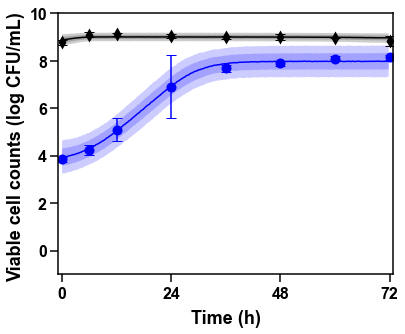

In [28]:
plt.figure(figsize=(6,4.8))


#y_Camp94
plt.errorbar(df_sd['Time'], df_sd['CO94.mean'], yerr = y_err94, 
             capsize=5, 
             fmt='None', 
             markersize=10, 
             ecolor='blue',
             markeredgecolor = "None",
             label='')

plt.plot(df_sd['Time'],df_sd['CO94.mean'],
         marker='o',
         markersize=10,
         markerfacecolor='blue',
         markeredgecolor='None',
         linestyle='None')

plt.plot(C94_add_df_2["Time"],C94_add_df_2["50"],
         marker='None',
         linestyle='solid',
         color='blue')

plt.fill_between(C94_add_df_2["Time"],C94_add_df_2["10"],C94_add_df_2["90"],facecolor='blue',alpha=0.2)
plt.fill_between(C94_add_df_2["Time"],C94_add_df_2["25"],C94_add_df_2["75"],facecolor='blue',alpha=0.2)

#y_Ent94
plt.errorbar(df_sd['Time'], df_sd['E94.mean'], yerr = y_errE94, 
             capsize=5, 
             fmt='None', 
             markersize=10, 
             ecolor='black',
             markeredgecolor = "None",
             label='')

plt.plot(df_sd['Time'],df_sd['E94.mean'],
         marker='d',
         markersize=10,
         markerfacecolor='black',
         markeredgecolor='None',
         linestyle='None')

plt.plot(E94_add_df_2["Time"],E94_add_df_2["50"],
         linestyle='solid',
         color='black')

plt.fill_between(E94_add_df_2["Time"],E94_add_df_2["10"],E94_add_df_2["90"],facecolor='black',alpha=0.2)
plt.fill_between(E94_add_df_2["Time"],E94_add_df_2["25"],E94_add_df_2["75"],facecolor='black',alpha=0.2)

plt.axis([-0.8,
          72.8,
          -1,
          9])

plt.xticks([0,24,48,72],
           size=16,
           weight='bold')

plt.yticks([0,2,4,6,8,10],
           size=16,
           weight='bold')

plt.xlabel('Time (h)',
          size=18,
          weight='bold', 
          labelpad=8)

plt.ylabel('Viable cell counts (log CFU/mL) ',
           size=18,
           weight='bold') 

plt.savefig("/Users/y.fuchisawa/Dropbox/渕澤/実験データ2020年度/model/O157_baranyi/O157_94_prediction80.pdf",transparent=True,bbox_inches='tight')

plt.show()

In [23]:
#抽出
C92_add = { }

for i in range(360):
     C92_add[i /5] = samples_C92['y_rep'][:,i] 


#％分割
C92_percentile_add = { }

for i in range(360):
     C92_percentile_add[i/5] = np.percentile(C92_add[i/5],q=[10,25,50,75,90])

#合算
C92_add_df_2 = pd.DataFrame(columns=['Time','10','25','50','75','90'])

for i in range(360):
    tmp_se = pd.Series( [i/5,
                         C92_percentile_add[i/5][0],
                         C92_percentile_add[i/5][1],
                         C92_percentile_add[i/5][2],
                         C92_percentile_add[i/5][3],
                         C92_percentile_add[i/5][4]], index=C92_add_df_2.columns)
    C92_add_df_2 = C92_add_df_2.append( tmp_se, ignore_index=True)

#Enterobacteria
#抽出
E92_add = { }

for i in range(360):
     E92_add[i /5] = samples_E92['y_rep'][:,i] 

#％分割
E92_percentile_add = { }

for i in range(360):
     E92_percentile_add[i/5] = np.percentile(E92_add[i/5],q=[10,25,50,75,90])

#合算
E92_add_df_2 = pd.DataFrame(columns=['Time','10','25','50','75','90'])

for i in range(360):
    tmp_se = pd.Series( [i/5,
                         E92_percentile_add[i/5][0],
                         E92_percentile_add[i/5][1],
                         E92_percentile_add[i/5][2],
                         E92_percentile_add[i/5][3],
                         E92_percentile_add[i/5][4]], index=E92_add_df_2.columns)
                         
    E92_add_df_2 = E92_add_df_2.append( tmp_se, ignore_index=True)

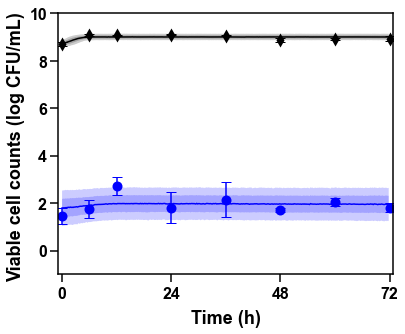

In [29]:
plt.figure(figsize=(6,4.8))


#y_Camp92
plt.errorbar(df_sd['Time'], df_sd['CO92.mean'], yerr = y_err92, 
             capsize=5, 
             fmt='None', 
             markersize=10, 
             ecolor='blue',
             markeredgecolor = "None",
             label='')

plt.plot(df_sd['Time'],df_sd['CO92.mean'],
         marker='o',
         markersize=10,
         markerfacecolor='blue',
         markeredgecolor='None',
         linestyle='None')

plt.plot(C92_add_df_2["Time"],C92_add_df_2["50"],
         marker='None',
         linestyle='solid',
         color='blue')

plt.fill_between(C92_add_df_2["Time"],C92_add_df_2["10"],C92_add_df_2["90"],facecolor='blue',alpha=0.2)
plt.fill_between(C92_add_df_2["Time"],C92_add_df_2["25"],C92_add_df_2["75"],facecolor='blue',alpha=0.2)

#y_Ent92
plt.errorbar(df_sd['Time'], df_sd['E92.mean'], yerr = y_errE92, 
             capsize=5, 
             fmt='None', 
             markersize=10, 
             ecolor='black',
             markeredgecolor = "None",
             label='')

plt.plot(df_sd['Time'],df_sd['E92.mean'],
         marker='d',
         markersize=10,
         markerfacecolor='black',
         markeredgecolor='None',
         linestyle='None')

plt.plot(E92_add_df_2["Time"],E92_add_df_2["50"],
         linestyle='solid',
         color='black')

plt.fill_between(E92_add_df_2["Time"],E92_add_df_2["10"],E92_add_df_2["90"],facecolor='black',alpha=0.2)
plt.fill_between(E92_add_df_2["Time"],E92_add_df_2["25"],E92_add_df_2["75"],facecolor='black',alpha=0.2)

plt.axis([-0.8,
          72.8,
          -1,
          9])

plt.xticks([0,24,48,72],
           size=16,
           weight='bold')

plt.yticks([0,2,4,6,8,10],
           size=16,
           weight='bold')

plt.xlabel('Time (h)',
          size=18,
          weight='bold', 
          labelpad=8)

plt.ylabel('Viable cell counts (log CFU/mL) ',
           size=18,
           weight='bold')

plt.savefig("/Users/y.fuchisawa/Dropbox/渕澤/実験データ2020年度/model/O157_baranyi/O157_92_prediction80.pdf",transparent=True,bbox_inches='tight')



plt.show()

In [25]:
#抽出
C91_add = { }

for i in range(360):
     C91_add[i /5] = samples_C91['y_rep'][:,i] 

#％分割
C91_percentile_add = { }

for i in range(360):
     C91_percentile_add[i/5] = np.percentile(C91_add[i/5],q=[10,25,50,75,90])

#合算
C91_add_df_2 = pd.DataFrame(columns=['Time','10','25','50','75','90'])

for i in range(360):
    tmp_se = pd.Series( [i/5,
                         C91_percentile_add[i/5][0],
                         C91_percentile_add[i/5][1],
                         C91_percentile_add[i/5][2],
                         C91_percentile_add[i/5][3],
                         C91_percentile_add[i/5][4]], index=C91_add_df_2.columns)
    C91_add_df_2 = C91_add_df_2.append( tmp_se, ignore_index=True)

#Enterobacteria
#抽出
E91_add = { }

for i in range(360):
     E91_add[i /5] = samples_E91['y_rep'][:,i] 

#％分割
E91_percentile_add = { }

for i in range(360):
     E91_percentile_add[i/5] = np.percentile(E91_add[i/5],q=[10,25,50,75,90])

#合算
E91_add_df_2 = pd.DataFrame(columns=['Time','10','25','50','75','90'])

for i in range(360):
    tmp_se = pd.Series( [i/5,
                         E91_percentile_add[i/5][0],
                         E91_percentile_add[i/5][1],
                         E91_percentile_add[i/5][2],
                         E91_percentile_add[i/5][3],
                         E91_percentile_add[i/5][4]], index=E91_add_df_2.columns)
                         
    E91_add_df_2 = E91_add_df_2.append(tmp_se, ignore_index=True)

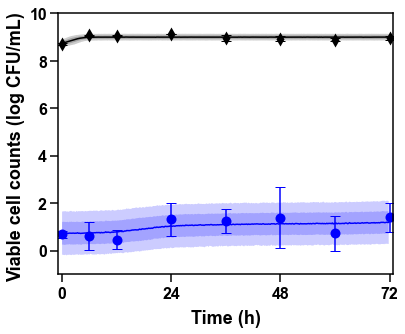

In [30]:
plt.figure(figsize=(6,4.8))


#y_Camp91
plt.errorbar(df_sd['Time'], df_sd['CO91.mean'], yerr = y_err91, 
             capsize=5, 
             fmt='None', 
             markersize=10, 
             ecolor='blue',
             markeredgecolor = "None",
             label='')

plt.plot(df_sd['Time'],df_sd['CO91.mean'],
         marker='o',
         markersize=10,
         markerfacecolor='blue',
         markeredgecolor='None',
         linestyle='None')

plt.plot(C91_add_df_2["Time"],C91_add_df_2["50"],
         marker='None',
         linestyle='solid',
         color='blue')

plt.fill_between(C91_add_df_2["Time"],C91_add_df_2["10"],C91_add_df_2["90"],facecolor='blue',alpha=0.2)
plt.fill_between(C91_add_df_2["Time"],C91_add_df_2["25"],C91_add_df_2["75"],facecolor='blue',alpha=0.2)

#y_Ent91
plt.errorbar(df_sd['Time'], df_sd['E91.mean'], yerr = y_errE91, 
             capsize=5, 
             fmt='None', 
             markersize=9, 
             ecolor='black',
             markeredgecolor = "None",
             label='')

plt.plot(df_sd['Time'],df_sd['E91.mean'],
         marker='d',
         markersize=10,
         markerfacecolor='black',
         markeredgecolor='None',
         linestyle='None')

plt.plot(E91_add_df_2["Time"],E91_add_df_2["50"],
         linestyle='solid',
         color='black')

plt.fill_between(E91_add_df_2["Time"],E91_add_df_2["10"],E91_add_df_2["90"],facecolor='black',alpha=0.2)
plt.fill_between(E91_add_df_2["Time"],E91_add_df_2["25"],E91_add_df_2["75"],facecolor='black',alpha=0.2)

plt.axis([-0.8,
          72.8,
          -1,
          9])

plt.xticks([0,24,48,72],
           size=16,
           weight='bold')

plt.yticks([0,2,4,6,8,10],
           size=16,
           weight='bold')

plt.xlabel('Time (h)',
          size=18,
          weight='bold', 
          labelpad=8)

plt.ylabel('Viable cell counts (log CFU/mL) ',
           size=18,
           weight='bold') 

plt.savefig("/Users/y.fuchisawa/Dropbox/渕澤/実験データ2020年度/model/O157_baranyi/O157_91_prediction80.pdf",transparent=True,bbox_inches='tight')



plt.show()

In [31]:
#抽出
C44_add = { }

for i in range(360):
     C44_add[i /5] = samples_C44['y_rep'][:,i] 

#％分割
C44_percentile_add = { }

for i in range(360):
     C44_percentile_add[i/5] = np.percentile(C44_add[i/5],q=[10,25,50,75,90])

#合算
C44_add_df_2 = pd.DataFrame(columns=['Time','10','25','50','75','90'])

for i in range(360):
    tmp_se = pd.Series( [i/5,
                         C44_percentile_add[i/5][0],
                         C44_percentile_add[i/5][1],
                         C44_percentile_add[i/5][2],
                         C44_percentile_add[i/5][3],
                         C44_percentile_add[i/5][4]], index=C44_add_df_2.columns)
    C44_add_df_2 = C44_add_df_2.append( tmp_se, ignore_index=True)

#Enterobacteria
#抽出
E44_add = { }

for i in range(360):
     E44_add[i /5] = samples_E44['y_rep'][:,i] 

#％分割
E44_percentile_add = { }

for i in range(360):
     E44_percentile_add[i/5] = np.percentile(E44_add[i/5],q=[10,25,50,75,90])

#合算
E44_add_df_2 = pd.DataFrame(columns=['Time','10','25','50','75','90'])

for i in range(360):
    tmp_se = pd.Series( [i/5,
                         E44_percentile_add[i/5][0],
                         E44_percentile_add[i/5][1],
                         E44_percentile_add[i/5][2],
                         E44_percentile_add[i/5][3],
                         E44_percentile_add[i/5][4]], index=E44_add_df_2.columns)
                         
    E44_add_df_2 = E44_add_df_2.append(tmp_se, ignore_index=True)

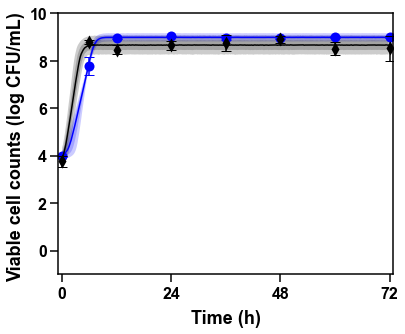

In [34]:
plt.figure(figsize=(6,4.8))


#y_Camp44
plt.errorbar(df_sd['Time'], df_sd['CO44.mean'], yerr = y_err44, 
             capsize=5, 
             fmt='None', 
             markersize=10, 
             ecolor='blue',
             markeredgecolor = "None",
             label='')

plt.plot(df_sd['Time'],df_sd['CO44.mean'],
         marker='o',
         markersize=10,
         markerfacecolor='blue',
         markeredgecolor='None',
         linestyle='None')

plt.plot(C44_add_df_2["Time"],C44_add_df_2["50"],
         marker='None',
         linestyle='solid',
         color='blue')

plt.fill_between(C44_add_df_2["Time"],C44_add_df_2["10"],C44_add_df_2["90"],facecolor='blue',alpha=0.2)
plt.fill_between(C44_add_df_2["Time"],C44_add_df_2["25"],C44_add_df_2["75"],facecolor='blue',alpha=0.2)

#y_Ent44
plt.errorbar(df_sd['Time'], df_sd['E44.mean'], yerr = y_errE44, 
             capsize=5, 
             fmt='None', 
             markersize=10, 
             ecolor='black',
             markeredgecolor = "None",
             label='')

plt.plot(df_sd['Time'],df_sd['E44.mean'],
         marker='d',
         markersize=10,
         markerfacecolor='black',
         markeredgecolor='None',
         linestyle='None')

plt.plot(E44_add_df_2["Time"],E44_add_df_2["50"],
         linestyle='solid',
         color='black')

plt.fill_between(E44_add_df_2["Time"],E44_add_df_2["10"],E44_add_df_2["90"],facecolor='black',alpha=0.2)
plt.fill_between(E44_add_df_2["Time"],E44_add_df_2["25"],E44_add_df_2["75"],facecolor='black',alpha=0.2)

plt.axis([-0.8,
          72.8,
          -1,
          9])

plt.xticks([0,24,48,72],
           size=16,
           weight='bold')

plt.yticks([0,2,4,6,8,10],
           size=16,
           weight='bold')

plt.xlabel('Time (h)',
          size=18,
          weight='bold', 
          labelpad=8)

plt.ylabel('Viable cell counts (log CFU/mL) ',
           size=18,
           weight='bold') 

plt.savefig("/Users/y.fuchisawa/Dropbox/渕澤/実験データ2020年度/model/O157_baranyi/O157_44_prediction80.pdf",transparent=True,bbox_inches='tight')



plt.show()

In [35]:
#抽出
C42_add = { }

for i in range(360):
     C42_add[i /5] = samples_C42['y_rep'][:,i] 

#％分割
C42_percentile_add = { }

for i in range(360):
     C42_percentile_add[i/5] = np.percentile(C42_add[i/5],q=[10,25,50,75,90])

#合算
C42_add_df_2 = pd.DataFrame(columns=['Time','10','25','50','75','90'])

for i in range(360):
    tmp_se = pd.Series( [i/5,
                         C42_percentile_add[i/5][0],
                         C42_percentile_add[i/5][1],
                         C42_percentile_add[i/5][2],
                         C42_percentile_add[i/5][3],
                         C42_percentile_add[i/5][4]], index=C42_add_df_2.columns)
    C42_add_df_2 = C42_add_df_2.append( tmp_se, ignore_index=True)

#Enterobacteria
#抽出
E42_add = { }

for i in range(360):
     E42_add[i /5] = samples_E42['y_rep'][:,i] 

#％分割
E42_percentile_add = { }

for i in range(360):
     E42_percentile_add[i/5] = np.percentile(E42_add[i/5],q=[10,25,50,75,90])

#合算
E42_add_df_2 = pd.DataFrame(columns=['Time','10','25','50','75','90'])

for i in range(360):
    tmp_se = pd.Series( [i/5,
                         E42_percentile_add[i/5][0],
                         E42_percentile_add[i/5][1],
                         E42_percentile_add[i/5][2],
                         E42_percentile_add[i/5][3],
                         E42_percentile_add[i/5][4]], index=E42_add_df_2.columns)
                         
    E42_add_df_2 = E42_add_df_2.append(tmp_se, ignore_index=True)

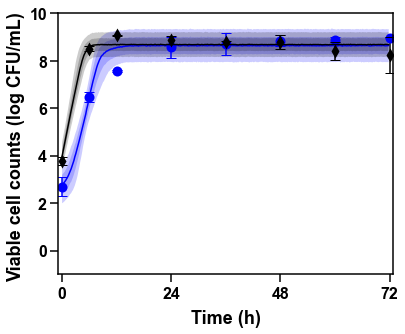

In [36]:
plt.figure(figsize=(6,4.8))


#y_Camp42
plt.errorbar(df_sd['Time'], df_sd['CO42.mean'], yerr = y_err42, 
             capsize=5, 
             fmt='None', 
             markersize=10, 
             ecolor='blue',
             markeredgecolor = "None",
             label='')

plt.plot(df_sd['Time'],df_sd['CO42.mean'],
         marker='o',
         markersize=10,
         markerfacecolor='blue',
         markeredgecolor='None',
         linestyle='None')

plt.plot(C42_add_df_2["Time"],C42_add_df_2["50"],
         marker='None',
         linestyle='solid',
         color='blue')

plt.fill_between(C42_add_df_2["Time"],C42_add_df_2["10"],C42_add_df_2["90"],facecolor='blue',alpha=0.2)
plt.fill_between(C42_add_df_2["Time"],C42_add_df_2["25"],C42_add_df_2["75"],facecolor='blue',alpha=0.2)

#y_Ent42
plt.errorbar(df_sd['Time'], df_sd['E42.mean'], yerr = y_errE42, 
             capsize=5, 
             fmt='None', 
             markersize=10, 
             ecolor='black',
             markeredgecolor = "None",
             label='')

plt.plot(df_sd['Time'],df_sd['E42.mean'],
         marker='d',
         markersize=10,
         markerfacecolor='black',
         markeredgecolor='None',
         linestyle='None')

plt.plot(E42_add_df_2["Time"],E42_add_df_2["50"],
         linestyle='solid',
         color='black')

plt.fill_between(E42_add_df_2["Time"],E42_add_df_2["10"],E42_add_df_2["90"],facecolor='black',alpha=0.2)
plt.fill_between(E42_add_df_2["Time"],E42_add_df_2["25"],E42_add_df_2["75"],facecolor='black',alpha=0.2)

plt.axis([-0.8,
          72.8,
          -1,
          9])

plt.xticks([0,24,48,72],
           size=16,
           weight='bold')

plt.yticks([0,2,4,6,8,10],
           size=16,
           weight='bold')

plt.xlabel('Time (h)',
          size=18,
          weight='bold', 
          labelpad=8)

plt.ylabel('Viable cell counts (log CFU/mL) ',
           size=18,
           weight='bold') 

plt.savefig("/Users/y.fuchisawa/Dropbox/渕澤/実験データ2020年度/model/O157_baranyi/O157_42_prediction80.pdf",transparent=True,bbox_inches='tight')




plt.show()

In [37]:
#抽出
C41_add = { }

for i in range(360):
     C41_add[i /5] = samples_C41['y_rep'][:,i] 


#％分割
C41_percentile_add = { }

for i in range(360):
     C41_percentile_add[i/5] = np.percentile(C41_add[i/5],q=[10,25,50,75,90])

#合算
C41_add_df_2 = pd.DataFrame(columns=['Time','10','25','50','75','90'])

for i in range(360):
    tmp_se = pd.Series( [i/5,
                         C41_percentile_add[i/5][0],
                         C41_percentile_add[i/5][1],
                         C41_percentile_add[i/5][2],
                         C41_percentile_add[i/5][3],
                         C41_percentile_add[i/5][4]], index=C41_add_df_2.columns)
    C41_add_df_2 = C41_add_df_2.append( tmp_se, ignore_index=True)

#Enterobacteria
#抽出
E41_add = { }

for i in range(360):
     E41_add[i /5] = samples_E41['y_rep'][:,i] 

#％分割
E41_percentile_add = { }

for i in range(360):
     E41_percentile_add[i/5] = np.percentile(E41_add[i/5],q=[10,25,50,75,90])

#合算
E41_add_df_2 = pd.DataFrame(columns=['Time','10','25','50','75','90'])

for i in range(360):
    tmp_se = pd.Series( [i/5,
                         E41_percentile_add[i/5][0],
                         E41_percentile_add[i/5][1],
                         E41_percentile_add[i/5][2],
                         E41_percentile_add[i/5][3],
                         E41_percentile_add[i/5][4]], index=E41_add_df_2.columns)
                         
    E41_add_df_2 = E41_add_df_2.append(tmp_se, ignore_index=True)

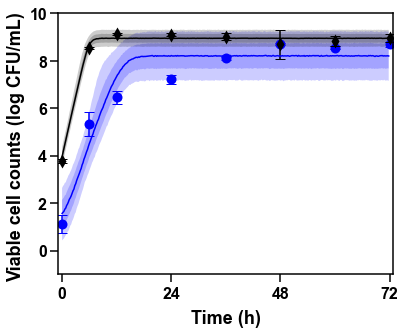

In [38]:
plt.figure(figsize=(6,4.8))


#y_Camp41
plt.errorbar(df_sd['Time'], df_sd['CO41.mean'], yerr = y_err41, 
             capsize=5, 
             fmt='None', 
             markersize=10, 
             ecolor='blue',
             markeredgecolor = "None",
             label='')

plt.plot(df_sd['Time'],df_sd['CO41.mean'],
         marker='o',
         markersize=10,
         markerfacecolor='blue',
         markeredgecolor='None',
         linestyle='None')

plt.plot(C41_add_df_2["Time"],C41_add_df_2["50"],
         marker='None',
         linestyle='solid',
         color='blue')

plt.fill_between(C41_add_df_2["Time"],C41_add_df_2["10"],C41_add_df_2["90"],facecolor='blue',alpha=0.2)
plt.fill_between(C41_add_df_2["Time"],C41_add_df_2["25"],C41_add_df_2["75"],facecolor='blue',alpha=0.2)

#y_Ent41
plt.errorbar(df_sd['Time'], df_sd['E41.mean'], yerr = y_errE41, 
             capsize=5, 
             fmt='None', 
             markersize=10, 
             ecolor='black',
             markeredgecolor = "None",
             label='')

plt.plot(df_sd['Time'],df_sd['E41.mean'],
         marker='d',
         markersize=10,
         markerfacecolor='black',
         markeredgecolor='None',
         linestyle='None')

plt.plot(E41_add_df_2["Time"],E41_add_df_2["50"],
         linestyle='solid',
         color='black')

plt.fill_between(E41_add_df_2["Time"],E41_add_df_2["10"],E41_add_df_2["90"],facecolor='black',alpha=0.2)
plt.fill_between(E41_add_df_2["Time"],E41_add_df_2["25"],E41_add_df_2["75"],facecolor='black',alpha=0.2)

plt.axis([-0.8,
          72.8,
          -1,
          9])

plt.xticks([0,24,48,72],
           size=16,
           weight='bold')

plt.yticks([0,2,4,6,8,10],
           size=16,
           weight='bold')

plt.xlabel('Time (h)',
          size=18,
          weight='bold', 
          labelpad=8)

plt.ylabel('Viable cell counts (log CFU/mL) ',
           size=18,
           weight='bold') 

plt.savefig("/Users/y.fuchisawa/Dropbox/渕澤/実験データ2020年度/model/O157_baranyi/O157_41_prediction80.pdf",transparent=True,bbox_inches='tight')


plt.show()

In [28]:
#抽出
C04_add = { }

for i in range(360):
     C04_add[i /5] = samples_C04['y_rep'][:,i] 

#％分割
C04_percentile_add = { }

for i in range(360):
     C04_percentile_add[i/5] = np.percentile(C04_add[i/5],q=[10,25,50,75,90])

#合算#抽出
C04_add = { }

for i in range(360):
     C04_add[i /5] = samples_C04['y_rep'][:,i] 

#％分割
C04_percentile_add = { }

for i in range(360):
     C04_percentile_add[i/5] = np.percentile(C04_add[i/5],q=[10,25,50,75,90])

#合算
C04_add_df_2 = pd.DataFrame(columns=['Time','10','25','50','75','90'])

for i in range(360):
    tmp_se = pd.Series( [i/5,
                         C04_percentile_add[i/5][0],
                         C04_percentile_add[i/5][1],
                         C04_percentile_add[i/5][2],
                         C04_percentile_add[i/5][3],
                         C04_percentile_add[i/5][4]], index=C04_add_df_2.columns)
    C04_add_df_2 = C04_add_df_2.append( tmp_se, ignore_index=True)

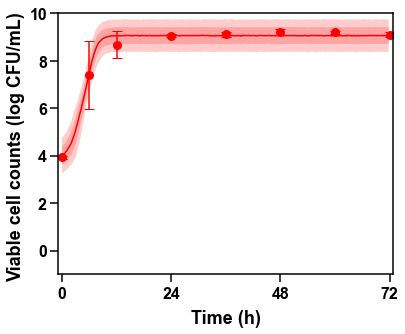

In [29]:
plt.figure(figsize=(6,4.8))


#y_Camp04
plt.errorbar(df_sd['Time'], df_sd['C4.mean'], yerr = y_err04, 
             capsize=5, 
             fmt='None', 
             markersize=9, 
             ecolor='red',
             markeredgecolor = "None",
             label='')

plt.plot(df_sd['Time'],df_sd['C4.mean'],
         marker='o',
         markersize=9,
         markerfacecolor='red',
         markeredgecolor='None',
         linestyle='None')

plt.plot(C04_add_df_2["Time"],C04_add_df_2["50"],
         marker='None',
         linestyle='solid',
         color='red')

plt.fill_between(C04_add_df_2["Time"],C04_add_df_2["10"],C04_add_df_2["90"],facecolor='red',alpha=0.2)
plt.fill_between(C04_add_df_2["Time"],C04_add_df_2["25"],C04_add_df_2["75"],facecolor='red',alpha=0.2)

plt.axis([-0.8,
          72.8,
          -1,
          9])

plt.xticks([0,24,48,72],
           size=16,
           weight='bold')

plt.yticks([0,2,4,6,8,10],
           size=16,
           weight='bold')

plt.xlabel('Time (h)',
          size=18,
          weight='bold', 
          labelpad=8)

plt.ylabel('Viable cell counts (log CFU/mL) ',
           size=18,
           weight='bold') 

plt.savefig("/Users/y.fuchisawa/Dropbox/渕澤/実験データ2020年度/model/O157_baranyi/O157_04_prediction_80.pdf",transparent=True,bbox_inches='tight')



plt.show()

In [30]:
#抽出
C02_add = { }

for i in range(360):
     C02_add[i /5] = samples_C02['y_rep'][:,i] 

#％分割
C02_percentile_add = { }

for i in range(360):
     C02_percentile_add[i/5] = np.percentile(C02_add[i/5],q=[10,25,50,75,90])

#合算#抽出
C02_add = { }

for i in range(360):
     C02_add[i /5] = samples_C02['y_rep'][:,i] 

#％分割
C02_percentile_add = { }

for i in range(360):
     C02_percentile_add[i/5] = np.percentile(C02_add[i/5],q=[10,25,50,75,90])

#合算
C02_add_df_2 = pd.DataFrame(columns=['Time','10','25','50','75','90'])

for i in range(360):
    tmp_se = pd.Series( [i/5,
                         C02_percentile_add[i/5][0],
                         C02_percentile_add[i/5][1],
                         C02_percentile_add[i/5][2],
                         C02_percentile_add[i/5][3],
                         C02_percentile_add[i/5][4]], index=C02_add_df_2.columns)
    C02_add_df_2 = C02_add_df_2.append( tmp_se, ignore_index=True)

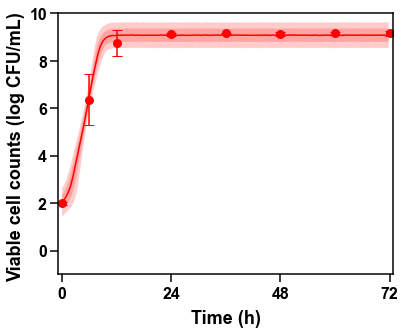

In [31]:
plt.figure(figsize=(6,4.8))


#y_Camp02
plt.errorbar(df_sd['Time'], df_sd['C2.mean'], yerr = y_err02, 
             capsize=5, 
             fmt='None', 
             markersize=9, 
             ecolor='red',
             markeredgecolor = "None",
             label='')

plt.plot(df_sd['Time'],df_sd['C2.mean'],
         marker='o',
         markersize=9,
         markerfacecolor='red',
         markeredgecolor='None',
         linestyle='None')

plt.plot(C02_add_df_2["Time"],C02_add_df_2["50"],
         marker='None',
         linestyle='solid',
         color='red')

plt.fill_between(C02_add_df_2["Time"],C02_add_df_2["10"],C02_add_df_2["90"],facecolor='red',alpha=0.2)
plt.fill_between(C02_add_df_2["Time"],C02_add_df_2["25"],C02_add_df_2["75"],facecolor='red',alpha=0.2)

plt.axis([-0.8,
          72.8,
          -1,
          9])

plt.xticks([0,24,48,72],
           size=16,
           weight='bold')

plt.yticks([0,2,4,6,8,10],
           size=16,
           weight='bold')

plt.xlabel('Time (h)',
          size=18,
          weight='bold', 
          labelpad=8)

plt.ylabel('Viable cell counts (log CFU/mL) ',
           size=18,
           weight='bold') 

plt.savefig("/Users/y.fuchisawa/Dropbox/渕澤/実験データ2020年度/model/O157_baranyi/O157_02_prediction_80.pdf",transparent=True,bbox_inches='tight')



plt.show()

In [32]:
#抽出
C01_add = { }

for i in range(360):
     C01_add[i /5] = samples_C01['y_rep'][:,i] 

#％分割
C01_percentile_add = { }

for i in range(360):
     C01_percentile_add[i/5] = np.percentile(C01_add[i/5],q=[10,25,50,75,90])

#合算#抽出
C01_add = { }

for i in range(360):
     C01_add[i /5] = samples_C01['y_rep'][:,i] 

#％分割
C01_percentile_add = { }

for i in range(360):
     C01_percentile_add[i/5] = np.percentile(C01_add[i/5],q=[10,25,50,75,90])

#合算
C01_add_df_2 = pd.DataFrame(columns=['Time','10','25','50','75','90'])

for i in range(360):
    tmp_se = pd.Series( [i/5,
                         C01_percentile_add[i/5][0],
                         C01_percentile_add[i/5][1],
                         C01_percentile_add[i/5][2],
                         C01_percentile_add[i/5][3],
                         C01_percentile_add[i/5][4]], index=C01_add_df_2.columns)
    C01_add_df_2 = C01_add_df_2.append( tmp_se, ignore_index=True)

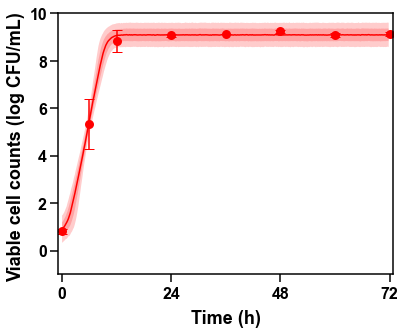

In [33]:
plt.figure(figsize=(6,4.8))


#y_Camp01
plt.errorbar(df_sd['Time'], df_sd['C1.mean'], yerr = y_err01, 
             capsize=5, 
             fmt='None', 
             markersize=9, 
             ecolor='red',
             markeredgecolor = "None",
             label='')

plt.plot(df_sd['Time'],df_sd['C1.mean'],
         marker='o',
         markersize=9,
         markerfacecolor='red',
         markeredgecolor='None',
         linestyle='None')

plt.plot(C01_add_df_2["Time"],C01_add_df_2["50"],
         marker='None',
         linestyle='solid',
         color='red')

plt.fill_between(C01_add_df_2["Time"],C01_add_df_2["10"],C01_add_df_2["90"],facecolor='red',alpha=0.2)
plt.fill_between(C01_add_df_2["Time"],C01_add_df_2["25"],C01_add_df_2["75"],facecolor='red',alpha=0.2)

plt.axis([-0.8,
          72.8,
          -1,
          9])

plt.xticks([0,24,48,72],
           size=16,
           weight='bold')

plt.yticks([0,2,4,6,8,10],
           size=16,
           weight='bold')

plt.xlabel('Time (h)',
          size=18,
          weight='bold', 
          labelpad=8)

plt.ylabel('Viable cell counts (log CFU/mL) ',
           size=18,
           weight='bold') 

plt.savefig("/Users/y.fuchisawa/Dropbox/渕澤/実験データ2020年度/model/O157_baranyi/O157_01_prediction_80.pdf",transparent=True,bbox_inches='tight')



plt.show()

In [39]:
from sklearn.metrics import mean_squared_error

In [40]:
C94_0_bay = np.percentile(samples_C94['N0'],q= 50)
C94_6_bay = np.percentile(samples_C94['y_rep'][:,29],q= 50)
C94_12_bay = np.percentile(samples_C94['y_rep'][:,59],q= 50)
C94_24_bay = np.percentile(samples_C94['y_rep'][:,119],q= 50)
C94_36_bay = np.percentile(samples_C94['y_rep'][:,179],q= 50)
C94_48_bay = np.percentile(samples_C94['y_rep'][:,239],q= 50)
C94_60_bay = np.percentile(samples_C94['y_rep'][:,299],q= 50)
C94_72_bay = np.percentile(samples_C94['y_rep'][:,359],q= 50)

y94_bay = [C94_0_bay,C94_6_bay,C94_12_bay,C94_24_bay,C94_36_bay,C94_48_bay,C94_60_bay,C94_72_bay]

RMSE_94 = np.sqrt(mean_squared_error(y94_bay, y_94))

print(RMSE_94)

0.11045654065113993


In [41]:
C92_0_bay = np.percentile(samples_C92['N0'],q= 50)
C92_6_bay = np.percentile(samples_C92['y_rep'][:,29],q= 50)
C92_12_bay = np.percentile(samples_C92['y_rep'][:,59],q= 50)
C92_24_bay = np.percentile(samples_C92['y_rep'][:,119],q= 50)
C92_36_bay = np.percentile(samples_C92['y_rep'][:,179],q= 50)
C92_48_bay = np.percentile(samples_C92['y_rep'][:,239],q= 50)
C92_60_bay = np.percentile(samples_C92['y_rep'][:,299],q= 50)
C92_72_bay = np.percentile(samples_C92['y_rep'][:,359],q= 50)

y92_bay = [C92_0_bay,C92_6_bay,C92_12_bay,C92_24_bay,C92_36_bay,C92_48_bay,C92_60_bay,C92_72_bay]

RMSE_92 = np.sqrt(mean_squared_error(y92_bay, y_92))

print(RMSE_92)

0.32997728242707985


In [42]:
C91_0_bay = np.percentile(samples_C91['N0'],q= 50)
C91_6_bay = np.percentile(samples_C91['y_rep'][:,29],q= 50)
C91_12_bay = np.percentile(samples_C91['y_rep'][:,59],q= 50)
C91_24_bay = np.percentile(samples_C91['y_rep'][:,119],q= 50)
C91_36_bay = np.percentile(samples_C91['y_rep'][:,179],q= 50)
C91_48_bay = np.percentile(samples_C91['y_rep'][:,239],q= 50)
C91_60_bay = np.percentile(samples_C91['y_rep'][:,299],q= 50)
C91_72_bay = np.percentile(samples_C91['y_rep'][:,359],q= 50)

y91_bay = [C91_0_bay,C91_6_bay,C91_12_bay,C91_24_bay,C91_36_bay,C91_48_bay,C91_60_bay,C91_72_bay]

RMSE_91 = np.sqrt(mean_squared_error(y91_bay, y_91))

print(RMSE_91)

0.24962601108485952


In [43]:
C44_0_bay = np.percentile(samples_C44['N0'],q= 50)
C44_6_bay = np.percentile(samples_C44['y_rep'][:,29],q= 50)
C44_12_bay = np.percentile(samples_C44['y_rep'][:,59],q= 50)
C44_24_bay = np.percentile(samples_C44['y_rep'][:,119],q= 50)
C44_36_bay = np.percentile(samples_C44['y_rep'][:,179],q= 50)
C44_48_bay = np.percentile(samples_C44['y_rep'][:,239],q= 50)
C44_60_bay = np.percentile(samples_C44['y_rep'][:,299],q= 50)
C44_72_bay = np.percentile(samples_C44['y_rep'][:,359],q= 50)

y44_bay = [C44_0_bay,C44_6_bay,C44_12_bay,C44_24_bay,C44_36_bay,C44_48_bay,C44_60_bay,C44_72_bay]

RMSE_44 = np.sqrt(mean_squared_error(y44_bay, y_44))

print(RMSE_44)

0.022059974260400097


In [44]:
C42_0_bay = np.percentile(samples_C42['N0'],q= 50)
C42_6_bay = np.percentile(samples_C42['y_rep'][:,29],q= 50)
C42_12_bay = np.percentile(samples_C42['y_rep'][:,59],q= 50)
C42_24_bay = np.percentile(samples_C42['y_rep'][:,119],q= 50)
C42_36_bay = np.percentile(samples_C42['y_rep'][:,179],q= 50)
C42_48_bay = np.percentile(samples_C42['y_rep'][:,239],q= 50)
C42_60_bay = np.percentile(samples_C42['y_rep'][:,299],q= 50)
C42_72_bay = np.percentile(samples_C42['y_rep'][:,359],q= 50)

y42_bay = [C42_0_bay,C42_6_bay,C42_12_bay,C42_24_bay,C42_36_bay,C42_48_bay,C42_60_bay,C42_72_bay]

RMSE_42 = np.sqrt(mean_squared_error(y42_bay, y_42))

print(RMSE_42)

0.38640501736635957


In [45]:
C41_0_bay = np.percentile(samples_C41['N0'],q= 50)
C41_6_bay = np.percentile(samples_C41['y_rep'][:,29],q= 50)
C41_12_bay = np.percentile(samples_C41['y_rep'][:,59],q= 50)
C41_24_bay = np.percentile(samples_C41['y_rep'][:,119],q= 50)
C41_36_bay = np.percentile(samples_C41['y_rep'][:,179],q= 50)
C41_48_bay = np.percentile(samples_C41['y_rep'][:,239],q= 50)
C41_60_bay = np.percentile(samples_C41['y_rep'][:,299],q= 50)
C41_72_bay = np.percentile(samples_C41['y_rep'][:,359],q= 50)

y41_bay = [C41_0_bay,C41_6_bay,C41_12_bay,C41_24_bay,C41_36_bay,C41_48_bay,C41_60_bay,C41_72_bay]

RMSE_41 = np.sqrt(mean_squared_error(y41_bay, y_41))

print(RMSE_41)

0.6365999088451748


In [46]:
print(RMSE_94,RMSE_92,RMSE_91,RMSE_44,RMSE_42,RMSE_41)

0.11045654065113993 0.32997728242707985 0.24962601108485952 0.022059974260400097 0.38640501736635957 0.6365999088451748


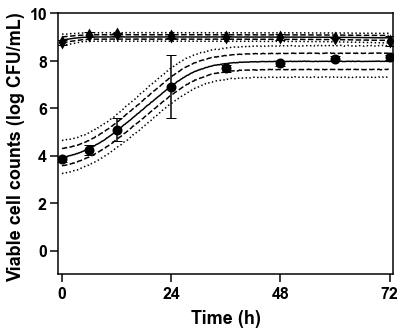

In [54]:
plt.figure(figsize=(6,4.8))


#y_Camp94
plt.errorbar(df_sd['Time'], df_sd['CO94.mean'], yerr = y_err94, 
             capsize=5, 
             fmt='None', 
             markersize=10, 
             ecolor='black',
             markeredgecolor = "None",
             label='')

plt.plot(C94_add_df_2["Time"],C94_add_df_2["10"],
         marker='None',
         linestyle=':',color='black')
plt.plot(C94_add_df_2["Time"],C94_add_df_2["90"],
         marker='None',
         linestyle=':',color='black')

plt.plot(C94_add_df_2["Time"],C94_add_df_2["25"],
         marker='None',
         linestyle='--',color='black')
plt.plot(C94_add_df_2["Time"],C94_add_df_2["75"],
         marker='None',
         linestyle='--',color='black')

plt.plot(df_sd['Time'],df_sd['CO94.mean'],
         marker='o',
         markersize=10,
         markerfacecolor='black',
         markeredgecolor='None',
         linestyle='None')

plt.plot(C94_add_df_2["Time"],C94_add_df_2["50"],
         marker='None',
         linestyle='solid',
         color='black')

#y_Ent94
plt.errorbar(df_sd['Time'], df_sd['E94.mean'], yerr = y_errE94, 
             capsize=5, 
             fmt='None', 
             markersize=10, 
             ecolor='black',
             markeredgecolor = "None",
             label='')

plt.plot(df_sd['Time'],df_sd['E94.mean'],
         marker='d',
         markersize=10,
         markerfacecolor='black',
         markeredgecolor='None',
         linestyle='None')


plt.plot(E94_add_df_2["Time"],E94_add_df_2["10"],
         marker='None',
         linestyle=':',color='black')
plt.plot(E94_add_df_2["Time"],E94_add_df_2["90"],
         marker='None',
         linestyle=':',color='black')

plt.plot(E94_add_df_2["Time"],E94_add_df_2["25"],
         marker='None',
         linestyle='--',color='black')
plt.plot(E94_add_df_2["Time"],E94_add_df_2["75"],
         marker='None',
         linestyle='--',color='black')

plt.plot(E94_add_df_2["Time"],E94_add_df_2["50"],
         linestyle='solid',
         color='black')

plt.axis([-0.8,
          72.8,
          -1,
          9])

plt.xticks([0,24,48,72],
           size=16,
           weight='bold')

plt.yticks([0,2,4,6,8,10],
           size=16,
           weight='bold')

plt.xlabel('Time (h)',
          size=18,
          weight='bold', 
          labelpad=8)

plt.ylabel('Viable cell counts (log CFU/mL) ',
           size=18,
           weight='bold') 

plt.savefig("/Users/y.fuchisawa/Dropbox/渕澤/実験データ2020年度/model/O157_baranyi/koenyoshi_O157_94_prediction_80.pdf",transparent=True,bbox_inches='tight')

plt.show()

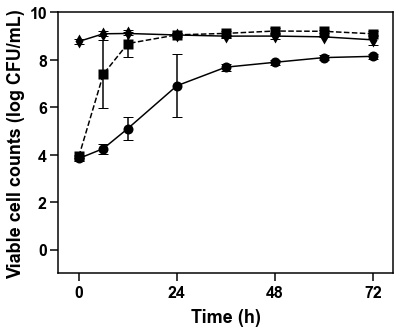

In [57]:
plt.figure(figsize=(6,4.8))

plt.errorbar(x, y_94, yerr = y_err94, 
             capsize=5, 
             fmt='None', 
             markersize=9, 
             ecolor='black',
             markeredgecolor = "None",
             label='')

plt.plot(x,y_94,
         marker='o',
         markersize=10,
         markerfacecolor='black',
         markeredgecolor='None',
         linestyle='solid',
         color='black',
         label='Listeria Co-Culture')

plt.errorbar(x, y_04, yerr = y_err04, 
             capsize=5, 
             fmt='None', 
             markersize=9, 
             ecolor='black',
             markeredgecolor = "None",
             label='')
plt.plot(x,y_04,
         marker='s',
         markersize=10,
         markerfacecolor='black',
         markeredgecolor='None',
         linestyle='dashed',
         color='black',
         label='Listeria Control')


plt.errorbar(x, y_E94, yerr = y_errE94, 
             capsize=5, 
             fmt='None', 
             markersize=9, 
             ecolor='black',
             markeredgecolor = "None",
             label='')

plt.plot(x,y_E94,
         marker='d',
         markersize=10,
         markerfacecolor='black',
         markeredgecolor='None',
         linestyle='solid',
         color='black',
         label='Listeria bacteria')

plt.axis([-5,
          77,
          -1,
          9])


plt.xticks([0,24,48,72],
           size=16,
           weight='bold')

plt.yticks([0,2,4,6,8,10],
           size=16,
           weight='bold')

plt.xlabel('Time (h)',
          size=18,
          weight='bold', 
          labelpad=8)

plt.ylabel('Viable cell counts (log CFU/mL)',
           size=18,
           weight='bold') 

plt.savefig("/Users/y.fuchisawa/Dropbox/渕澤/実験データ2020年度/model/O157_baranyi/koenyoshi_O157_Competition94_with Err.pdf",transparent=True,bbox_inches='tight',)

plt.show()

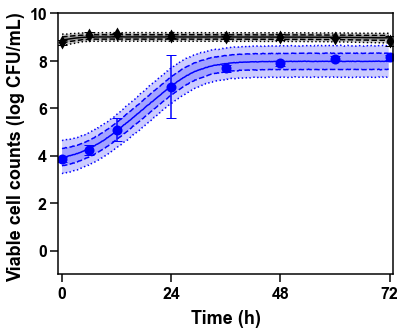

In [9]:
plt.figure(figsize=(6,4.8))


#y_Camp94
plt.errorbar(df_sd['Time'], df_sd['CO94.mean'], yerr = y_err94, 
             capsize=5, 
             fmt='None', 
             markersize=10, 
             ecolor='blue',
             markeredgecolor = "None",
             label='')

plt.plot(C94_add_df_2["Time"],C94_add_df_2["10"],
         marker='None',
         linestyle=':',color='blue')
plt.plot(C94_add_df_2["Time"],C94_add_df_2["90"],
         marker='None',
         linestyle=':',color='blue')

plt.plot(C94_add_df_2["Time"],C94_add_df_2["25"],
         marker='None',
         linestyle='--',color='blue')
plt.plot(C94_add_df_2["Time"],C94_add_df_2["75"],
         marker='None',
         linestyle='--',color='blue')

plt.plot(df_sd['Time'],df_sd['CO94.mean'],
         marker='o',
         markersize=10,
         markerfacecolor='blue',
         markeredgecolor='None',
         linestyle='None')

plt.plot(C94_add_df_2["Time"],C94_add_df_2["50"],
         marker='None',
         linestyle='solid',
         color='blue')

plt.fill_between(C94_add_df_2["Time"],C94_add_df_2["10"],C94_add_df_2["90"],facecolor='blue',alpha=0.2)
plt.fill_between(C94_add_df_2["Time"],C94_add_df_2["25"],C94_add_df_2["75"],facecolor='blue',alpha=0.2)


#y_Ent94
plt.errorbar(df_sd['Time'], df_sd['E94.mean'], yerr = y_errE94, 
             capsize=5, 
             fmt='None', 
             markersize=10, 
             ecolor='black',
             markeredgecolor = "None",
             label='')

plt.plot(df_sd['Time'],df_sd['E94.mean'],
         marker='d',
         markersize=10,
         markerfacecolor='black',
         markeredgecolor='None',
         linestyle='None')


plt.plot(E94_add_df_2["Time"],E94_add_df_2["10"],
         marker='None',
         linestyle=':',color='black')
plt.plot(E94_add_df_2["Time"],E94_add_df_2["90"],
         marker='None',
         linestyle=':',color='black')

plt.plot(E94_add_df_2["Time"],E94_add_df_2["25"],
         marker='None',
         linestyle='--',color='black')
plt.plot(E94_add_df_2["Time"],E94_add_df_2["75"],
         marker='None',
         linestyle='--',color='black')

plt.plot(E94_add_df_2["Time"],E94_add_df_2["50"],
         linestyle='solid',
         color='black')

plt.fill_between(E94_add_df_2["Time"],E94_add_df_2["10"],E94_add_df_2["90"],facecolor='black',alpha=0.2)
plt.fill_between(E94_add_df_2["Time"],E94_add_df_2["25"],E94_add_df_2["75"],facecolor='black',alpha=0.2)


plt.axis([-0.8,
          72.8,
          -1,
          9])

plt.xticks([0,24,48,72],
           size=16,
           weight='bold')

plt.yticks([0,2,4,6,8,10],
           size=16,
           weight='bold')

plt.xlabel('Time (h)',
          size=18,
          weight='bold', 
          labelpad=8)

plt.ylabel('Viable cell counts (log CFU/mL) ',
           size=18,
           weight='bold') 

plt.savefig("/Users/y.fuchisawa/Dropbox/渕澤/実験データ2020年度/model/O157_baranyi/koenslide_O157_94_prediction_80.pdf",transparent=True,bbox_inches='tight')

plt.show()

In [4]:
def func1(ts,Nmax,mumax,lag, N0): # １次式近似
    y = Nmax + np.log10((-1 + np.exp(mumax * lag) + np.exp(mumax * ts))/(np.exp(mumax * ts) -1 + (np.exp(mumax * lag) * 10**(Nmax - N0))))
    return y

In [5]:
x_observed = np.array(ts)
y04_observed = np.array(C04)
yE4_observed = np.array(E41)

In [6]:
from scipy.optimize import curve_fit  
popt, pcov = curve_fit(func1,x_observed,y04_observed) # poptは最適推定値、pcovは共分散
popt

array([ 9.13584868,  0.55902125, -8.36880847,  3.93138911])

In [7]:
from scipy.optimize import curve_fit  
popt, pcov = curve_fit(func1,x_observed,yE4_observed) # poptは最適推定値、pcovは共分散
popt

array([8.95867082, 2.57397372, 1.54043153, 3.77955643])